<a href="https://colab.research.google.com/github/ZadarX43/BAWA_SOURCE/blob/ZadarX43-patch-1/Copy_of_BAWA_Bard_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from xgboost import XGBClassifier


In [ ]:
import pandas as pd

# Assuming you have mounted your Google Drive and the path to your files is set correctly
path_to_files = '/content/drive/My Drive/'  # Update this with the correct path

# Load each file into a DataFrame
league_stats_df = pd.read_csv(path_to_files + "europe-uefa-champions-league-league-2023-to-2024-stats.csv")
matches_df = pd.read_csv(path_to_files + "europe-uefa-champions-league-matches-2023-to-2024-stats.csv")
players_df = pd.read_csv(path_to_files + "europe-uefa-champions-league-players-2023-to-2024-stats.csv")
teams_df = pd.read_csv(path_to_files + "europe-uefa-champions-league-teams-2023-to-2024-stats.csv")

# Display the first few rows of each DataFrame to verify
print(league_stats_df.head())
print(matches_df.head())
print(players_df.head())
print(teams_df.head())


                    name     season       status format  number_of_clubs  \
0  UEFA Champions League  2023/2024  In Progress    cup               78   

   total_matches  matches_completed  game_week  total_game_week  progress  \
0            185                153          0                0        83   

   ...  goals_min_61_to_70  goals_min_71_to_80  goals_min_81_to_90  \
0  ...                  41                  42                  80   

   goals_min_0_to_15  goals_min_16_to_30  goals_min_31_to_45  \
0                 59                  69                  76   

   goals_min_46_to_60  goals_min_61_to_75  goals_min_76_to_90  \
0                  77                  66                  97   

   xg_avg_per_match  
0              3.01  

[1 rows x 71 columns]
    timestamp              date_GMT    status  attendance  \
0  1687870800  Jun 27 2023 - 1:00pm  complete         NaN   
1  1687892400  Jun 27 2023 - 7:00pm  complete         NaN   
2  1688151600  Jun 30 2023 - 7:00pm  comp

In [ ]:
AUTOMATION SCRIPT FOR LOADING THE FILES

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to load data for a single league
def load_league_data(league_name, path_to_files):
    data = {}
    file_types = ['players', 'teams', 'matches', 'league']
    for file_type in file_types:
        filename = f"{league_name}-{file_type}-2023-to-2024-stats.csv"
        data[file_type] = pd.read_csv(os.path.join(path_to_files, filename))
    return data

# Function to preprocess data (You'll fill in the details of preprocessing based on your needs)
def preprocess_data(data):
    # Example preprocessing steps:
    # - Handle missing values
    # - Feature engineering
    # - Encode categorical variables
    # - Normalize/standardize numerical variables
    # Add your preprocessing steps here
    return data

# Function to merge dataframes (if needed)
def merge_dataframes(players_df, teams_df, matches_df, league_stats_df):
    # Example of merging
    # You will need to adjust the merging logic based on how you want to combine your data
    merged_df = pd.merge(matches_df, teams_df, on='team_key')
    merged_df = pd.merge(merged_df, players_df, on='player_key')
    return merged_df

# Function to split the data into features and target
def split_data(merged_df, target_column):
    X = merged_df.drop(target_column, axis=1)
    y = merged_df[target_column]
    return X, y

# Function to automate the process for all leagues
def automate_process(path_to_files, leagues, target_column):
    for league_name in leagues:
        print(f"Processing data for {league_name}...")
        data = load_league_data(league_name, path_to_files)
        data = preprocess_data(data)
        merged_df = merge_dataframes(**data)
        X, y = split_data(merged_df, target_column)

        # Split into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # You would add here your model training and saving logic
        # ...

if __name__ == "__main__":
    path_to_files = '/content/drive/My Drive/94_betting_model/'  # Update this with the correct path
    leagues = [
        'europe-uefa-europa-conference-league',
        'england-fa-womens-super-league',
        # Add all your league names here...
    ]
    target_column = 'FTR'  # Update this if your target variable is named differently

    automate_process(path_to_files, leagues, target_column)


Processing data for europe-uefa-europa-conference-league...


TypeError: ignored

***AUTOMATION FOR EASE OF PIPEPLINE***

In [ ]:
AUTOMATION FOR EASE OF PIPEPLINE

In [ ]:
import os

# List the contents of the main Google Drive directory
os.listdir('/content/drive/My Drive/')


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Set your Google Drive path
path_to_files = '/content/drive/My Drive/94_betting_model/'

# Define your leagues
leagues = [
    'europe-uefa-europa-conference-league',
    'england-fa-womens-super-league',
    'england-premier-league',
    'europe-uefa-europa-league',
    'europe-uefa-champions-league',
    # ... add other leagues as needed
]

# Define the preprocessing function
def preprocess_data(df):
    # Here, you would include steps such as:
    # - Handling missing values
    # - Feature engineering
    # - Encoding categorical variables
    # - Normalizing or standardizing features
    # ... add your preprocessing steps
    return df

# Define the merging function
def merge_dataframes(league_name):
    # Load all related dataframes
    players_df = pd.read_csv(f'{path_to_files}{league_name}-players-2023-to-2024-stats.csv')
    teams_df = pd.read_csv(f'{path_to_files}{league_name}-teams-2023-to-2024-stats.csv')
    matches_df = pd.read_csv(f'{path_to_files}{league_name}-matches-2023-to-2024-stats.csv')
    league_stats_df = pd.read_csv(f'{path_to_files}{league_name}-league-2023-to-2024-stats.csv')

    # Merge your dataframes in the way that aligns with your model needs
    # Example:
    # merged_df = pd.merge(matches_df, players_df, on='common_column')
    # ... add your merge logic

    return merged_df

# Define the automation function
def automate_process(leagues, target_column):
    for league_name in leagues:
        print(f'Processing data for {league_name}')

        # Merge dataframes
        merged_df = merge_dataframes(league_name)

        # Preprocess data
        processed_df = preprocess_data(merged_df)

        # Split into features and target
        X = processed_df.drop(target_column, axis=1)
        y = processed_df[target_column]

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # At this point, you can add your model training and evaluation code
        # ...

# Call the function
automate_process(leagues, 'target_column_name')  # Replace 'target_column_name' with the actual name of your target column


Processing data for europe-uefa-europa-conference-league


NameError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_preprocess(path, league_name):
    # Load each dataset
    team_stats = pd.read_csv(f'{path}{league_name}-teams-2023-to-2024-stats.csv')
    player_stats = pd.read_csv(f'{path}{league_name}-players-2023-to-2024-stats.csv')
    match_stats = pd.read_csv(f'{path}{league_name}-matches-2023-to-2024-stats.csv')
    league_stats = pd.read_csv(f'{path}{league_name}-league-2023-to-2024-stats.csv')

    # Preprocessing steps (as an example, this would be customized to your data)
    # Merge the datasets on common columns (e.g., team name)
    # merged_df = pd.merge(match_stats, team_stats, left_on='home_team_name', right_on='team_name')
    # More preprocessing steps...

    # Return the preprocessed dataframe
    return merged_df

def get_training_testing_features(preprocessed_df):
    # Extracting the features and target from the preprocessed dataframe
    features = preprocessed_df[['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count',
                                'away_team_goal_count', 'average_corners_per_match_pre_match',
                                'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
                                'odds_ft_draw', 'odds_ft_away_team_win']]
    target = preprocessed_df['result_column']  # Replace 'result_column' with the actual result column name

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

def main():
    path_to_files = '/content/drive/My Drive/94_betting_model/'
    leagues = [
        'europe-uefa-europa-conference-league',
        'england-fa-womens-super-league',
        # ... add other leagues as needed
    ]

    for league_name in leagues:
        preprocessed_df = load_and_preprocess(path_to_files, league_name)
        X_train, X_test, y_train, y_test = get_training_testing_features(preprocessed_df)

        # Here, you can add your model training and evaluation
        # model.fit(X_train, y_train)
        # ...

if __name__ == "__main__":
    main()


NameError: ignored

***LOAD AND PREPROCESS AUTOMATION CODE FOR NEW FILE LOADS***

In [ ]:
def load_and_preprocess(path, league_name):
    # Load each dataset
    team_stats = pd.read_csv(f'{path}{league_name}-teams-2023-to-2024-stats.csv')
    player_stats = pd.read_csv(f'{path}{league_name}-players-2023-to-2024-stats.csv')
    match_stats = pd.read_csv(f'{path}{league_name}-matches-2023-to-2024-stats.csv')
    league_stats = pd.read_csv(f'{path}{league_name}-league-2023-to-2024-stats.csv')

    # Preprocessing steps (you need to customize this to your data)
    # For example, if you want to merge match_stats and team_stats on team names:
    # Ensure that the team names match exactly in both dataframes, or map them to be the same.
    merged_df = pd.merge(match_stats, team_stats, left_on='home_team_name', right_on='team_name', how='left')

    # Add more preprocessing steps as needed, such as merging with player_stats and league_stats
    # and handle missing values, create new features, etc.

    # Assuming merged_df is your final merged DataFrame after all preprocessing
    return merged_df


In [ ]:
import pandas as pd

def load_and_preprocess_all_leagues(path, league_names):
    all_leagues_data = []

    for league_name in league_names:
        # Load each dataset for the league
        team_stats = pd.read_csv(f'{path}{league_name}-teams-2023-to-2024-stats.csv')
        player_stats = pd.read_csv(f'{path}{league_name}-players-2023-to-2024-stats.csv')
        match_stats = pd.read_csv(f'{path}{league_name}-matches-2023-to-2024-stats.csv')
        league_stats = pd.read_csv(f'{path}{league_name}-league-2023-to-2024-stats.csv')

        # Preprocessing steps for each league
        # Example merge (customize as per your requirement)
        merged_df = pd.merge(match_stats, team_stats, left_on='home_team_name', right_on='team_name', how='left')

        # Add more preprocessing steps as needed
        # ...

        # Append the processed DataFrame to the list
        all_leagues_data.append(merged_df)

    # Concatenate all league data into one DataFrame
    combined_df = pd.concat(all_leagues_data, ignore_index=True)

    return combined_df

# List of league names
league_names = ['europe-uefa-europa-league', 'england-premier-league', 'europe-uefa-champions-league', 'england-fa-womens-super-league', 'europe-uefa-europa-conference-league']  # Add any other leagues if needed

# Replace with your actual file path
path_to_files = '/content/drive/My Drive/94_betting_model/'

# Load and preprocess data for all leagues
combined_leagues_df = load_and_preprocess_all_leagues(path_to_files, league_names)


In [ ]:
# Exporting the combined_leagues_df DataFrame to a CSV file
combined_leagues_df.to_csv('/content/drive/My Drive/94_betting_model/combined_leagues_data.csv', index=False)

# Extracting specified training features
selected_features = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']
training_data = combined_leagues_df[selected_features]

# Optionally, you can also export the extracted training data
training_data.to_csv('/content/drive/My Drive/94_betting_model/training_data.csv', index=False)


In [ ]:
print(combined_leagues_df.columns)


Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)',
       ...
       'goals_conceded_min_61_to_70', 'goals_conceded_min_71_to_80',
       'goals_conceded_min_81_to_90', 'draw_percentage_overall',
       'draw_percentage_home', 'draw_percentage_away',
       'loss_percentage_ovearll', 'loss_percentage_home',
       'loss_percentage_away', 'over145_corners_percentage'],
      dtype='object', length=359)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/94_betting_model/'


To implement the Full-Time Result (FTR) calculation along with other necessary statistics, you can use the following steps:

Calculate Team Form: This function calculates the form of each team over the last 'n' matches.

Calculate Head-to-Head Statistics: This function calculates head-to-head statistics between two teams.

Create FTR Column: This function adds a new column to your DataFrame that indicates the full-time result of each match.

Here's the code for these steps:

In [ ]:
Function to calculate form for a given number of matches

In [ ]:
import pandas as pd

# Function to calculate form for a given number of matches
def calculate_form(df, team_name, n_matches=5):
    recent_matches = df[(df['home_team_name'] == team_name) | (df['away_team_name'] == team_name)]
    recent_matches = recent_matches.sort_values('date_GMT').tail(n_matches)
    points = 0
    for index, row in recent_matches.iterrows():
        if row['home_team_name'] == team_name:
            if row['home_team_goal_count'] > row['away_team_goal_count']:
                points += 3  # Home win
            elif row['home_team_goal_count'] == row['away_team_goal_count']:
                points += 1  # Draw
        else:  # Away team
            if row['away_team_goal_count'] > row['home_team_goal_count']:
                points += 3  # Away win
            elif row['away_team_goal_count'] == row['home_team_goal_count']:
                points += 1  # Draw
    return points / (3 * n_matches)  # Average points per match

# Function to calculate head-to-head statistics
def calculate_head_to_head_stats(df, team1, team2):
    matches = df[((df['home_team_name'] == team1) & (df['away_team_name'] == team2)) |
                 ((df['home_team_name'] == team2) & (df['away_team_name'] == team1))]
    home_wins = len(matches[(matches['home_team_name'] == team1) & (matches['home_team_goal_count'] > matches['away_team_goal_count'])])
    away_wins = len(matches[(matches['home_team_name'] == team2) & (matches['home_team_goal_count'] < matches['away_team_goal_count'])])
    draws = len(matches[matches['home_team_goal_count'] == matches['away_team_goal_count']])
    return {'home_wins': home_wins, 'away_wins': away_wins, 'draws': draws}

# Function to create FTR column
def create_ftr_column(df):
    df['FTR'] = df.apply(lambda row: 0 if row['home_team_goal_count'] > row['away_team_goal_count'] else 1, axis=1)

# Apply these functions to your DataFrame
# Assuming 'combined_leagues_df' is your main DataFrame
combined_leagues_df['home_team_form'] = combined_leagues_df.apply(lambda row: calculate_form(combined_leagues_df, row['home_team_name']), axis=1)
combined_leagues_df['away_team_form'] = combined_leagues_df.apply(lambda row: calculate_form(combined_leagues_df, row['away_team_name']), axis=1)
combined_leagues_df['head_to_head'] = combined_leagues_df.apply(lambda row: calculate_head_to_head_stats(combined_leagues_df, row['home_team_name'], row['away_team_name']), axis=1)
create_ftr_column(combined_leagues_df)

# Now your DataFrame will have new columns for team form, head-to-head stats, and FTR


***this runs for predictions***

In [ ]:
import joblib

# Load the model from the file
model_path = '/content/drive/My Drive/94_betting_model/94_betting_model.pkl'  # Update with your correct path
model = joblib.load(model_path)

# Assuming 'combined_leagues_df' is your new data
# And 'selected_features' are the features used by the model
selected_features = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']

# Select the features from your new data
X_new = combined_leagues_df[selected_features]

# Make predictions
predictions = model.predict(X_new)

# Add predictions to the DataFrame
combined_leagues_df['Predicted_FTR'] = predictions

# Optionally, you can save the DataFrame with predictions to a new CSV file
combined_leagues_df.to_csv('/content/drive/My Drive/94_betting_model/predictions.csv', index=False)


In [ ]:
predictions

predictions - (date and time)

In [ ]:
import pandas as pd

# Load your predictions DataFrame
# Replace 'your_predictions_file_path' with the path to your CSV file containing predictions
predictions_df = pd.read_csv('/content/drive/My Drive/94_betting_model/predictions.csv')

# Analyze Prediction Patterns
home_wins = predictions_df[predictions_df['FTR'] == 0].shape[0]  # Assuming 0 represents home wins
draws = predictions_df[predictions_df['FTR'] == 1].shape[0]      # Assuming 1 represents draws
away_wins = predictions_df[predictions_df['FTR'] == 2].shape[0]  # Assuming 2 represents away wins

print(f"Home Wins: {home_wins}, Draws: {draws}, Away Wins: {away_wins}")

# Exporting Data for Records
predictions_df.to_csv('your_predictions.csv', index=False)

# Note: Since actual outcomes are not available, accuracy cannot be computed at this stage.


Home Wins: 360, Draws: 588, Away Wins: 251


In [ ]:
# List of specific dates and times
dates_and_times_of_interest = [
    'Nov 30 2023 - 5:45pm', 'Nov 30 2023 - 8:00pm', 'Nov 29 2023 - 8:00pm',
    'Dec 02 2023 - 3:00pm', 'Dec 05 2023 - 7:30pm', 'Dec 02 2023 - 5:30pm',
    'Dec 03 2023 - 2:00pm', 'Dec 02 2023 - 8:00pm', 'Dec 03 2023 - 4:30pm',
    'Dec 06 2023 - 7:30pm'
]

# Convert string dates to datetime format
dates_and_times_of_interest = pd.to_datetime(dates_and_times_of_interest, format='%b %d %Y - %I:%M%p')

# Filter the DataFrame for the specified dates and times
matches_on_dates = combined_leagues_df[combined_leagues_df['date_GMT'].isin(dates_and_times_of_interest)]

print(f"Number of matches on specified dates and times: {len(matches_on_dates)}")

# Check if the required feature columns are present
print("Checking if the required feature columns are present:")
for col in feature_columns:
    if col not in combined_leagues_df.columns:
        print(f"Missing column: {col}")

# Display first few rows for the dates of interest
matches_on_dates.head()


Number of matches on specified dates and times: 52
Checking if the required feature columns are present:


,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,home_team_form,away_team_form,head_to_head,FTR,Predicted_FTR
97,1701366300,2023-11-30 17:45:00,incomplete,-1.0,Freiburg,Olympiakos Piraeus,NaN,5.0,2.25,1.75,...,NaN,NaN,NaN,NaN,NaN,0.666667,0.333333,"{'home_wins': 0, 'away_wins': 1, 'draws': 1}",1,1
98,1701366300,2023-11-30 17:45:00,incomplete,-1.0,Bačka Topola,West Ham United,NaN,5.0,0.25,2.25,...,NaN,NaN,NaN,NaN,NaN,0.133333,0.600000,"{'home_wins': 0, 'away_wins': 0, 'draws': 1}",1,1
99,1701366300,2023-11-30 17:45:00,incomplete,-1.0,AEK Athens,Brighton & Hove Albion,NaN,5.0,1.00,1.75,...,NaN,NaN,NaN,NaN,NaN,0.333333,0.600000,"{'home_wins': 0, 'away_wins': 1, 'draws': 1}",1,1
100,1701366300,2023-11-30 17:45:00,incomplete,-1.0,Sparta Praha,Real Betis,NaN,5.0,1.17,2.25,...,NaN,NaN,NaN,NaN,NaN,0.333333,0.666667,"{'home_wins': 0, 'away_wins': 0, 'draws': 1}",1,1
101,1701366300,2023-11-30 17:45:00,incomplete,-1.0,Atalanta,Sporting CP,NaN,5.0,2.50,1.75,...,NaN,NaN,NaN,NaN,NaN,0.733333,0.533333,"{'home_wins': 0, 'away_wins': 1, 'draws': 1}",1,1


In [ ]:
# Print the filtered DataFrame
print(matches_on_dates)

# Save the filtered DataFrame to a CSV file
csv_filename = '/content/drive/My Drive/94_betting_model/matches_on_specific_dates.csv'
matches_on_dates.to_csv(csv_filename, index=False)

print(f"Filtered matches saved to {csv_filename}")


       timestamp            date_GMT      status  attendance  \
97    1701366300 2023-11-30 17:45:00  incomplete        -1.0   
98    1701366300 2023-11-30 17:45:00  incomplete        -1.0   
99    1701366300 2023-11-30 17:45:00  incomplete        -1.0   
100   1701366300 2023-11-30 17:45:00  incomplete        -1.0   
101   1701366300 2023-11-30 17:45:00  incomplete        -1.0   
102   1701366300 2023-11-30 17:45:00  incomplete        -1.0   
103   1701366300 2023-11-30 17:45:00  incomplete        -1.0   
104   1701374400 2023-11-30 20:00:00  incomplete        -1.0   
105   1701374400 2023-11-30 20:00:00  incomplete        -1.0   
106   1701374400 2023-11-30 20:00:00  incomplete        -1.0   
107   1701374400 2023-11-30 20:00:00  incomplete        -1.0   
108   1701374400 2023-11-30 20:00:00  incomplete        -1.0   
109   1701374400 2023-11-30 20:00:00  incomplete        -1.0   
110   1701374400 2023-11-30 20:00:00  incomplete        -1.0   
111   1701374400 2023-11-30 20:00:00  in

In [ ]:
# Check if the DataFrame contains the required dates
print("Dates in the dataset:", combined_leagues_df['date_GMT'].unique())

# Check if the feature columns are available in the DataFrame
print("Columns in the DataFrame:", combined_leagues_df.columns)


Dates in the dataset: ['2023-08-08T14:00:00.000000000' '2023-08-10T16:00:00.000000000'
 '2023-08-10T17:00:00.000000000' '2023-08-10T19:00:00.000000000'
 '2023-08-17T16:00:00.000000000' '2023-08-17T17:00:00.000000000'
 '2023-08-17T17:30:00.000000000' '2023-08-17T18:00:00.000000000'
 '2023-08-24T17:00:00.000000000' '2023-08-24T18:00:00.000000000'
 '2023-08-24T18:30:00.000000000' '2023-08-24T18:45:00.000000000'
 '2023-08-24T19:00:00.000000000' '2023-08-31T16:00:00.000000000'
 '2023-08-31T17:00:00.000000000' '2023-08-31T18:00:00.000000000'
 '2023-08-31T18:30:00.000000000' '2023-08-31T18:45:00.000000000'
 '2023-08-31T19:00:00.000000000' '2023-09-21T16:45:00.000000000'
 '2023-09-21T16:55:00.000000000' '2023-09-21T19:00:00.000000000'
 '2023-10-05T16:45:00.000000000' '2023-10-05T19:00:00.000000000'
 '2023-10-26T16:45:00.000000000' '2023-10-26T19:00:00.000000000'
 '2023-11-09T17:45:00.000000000' '2023-11-09T20:00:00.000000000'
 '2023-11-30T17:45:00.000000000' '2023-11-30T20:00:00.000000000'
 '2

In [ ]:
# Check if X is empty
if X.empty:
    print("The feature DataFrame 'X' is empty.")
else:
    # Print the shape and column names of X
    print("Shape of X:", X.shape)
    print("Columns in X:", X.columns.tolist())

    # Optionally, check the first few rows of X to verify data
    print(X.head())


The feature DataFrame 'X' is empty.


In [ ]:
import pandas as pd

# Assuming this is your model's predicted probabilities
predicted_probabilities = model.predict_proba(X)  # Replace 'X' with your features DataFrame

# Check the shape of the predicted probabilities
print("Shape of predicted probabilities:", predicted_probabilities.shape)

# If shape is correct, proceed to create DataFrame
if predicted_probabilities.shape[1] == 3:  # Ensuring there are three columns for three classes
    probabilities_df = pd.DataFrame(predicted_probabilities, columns=['Prob_Home_Win', 'Prob_Draw', 'Prob_Away_Win'])
    combined_df = pd.concat([predictions_df, probabilities_df], axis=1)
    combined_df.to_csv('/path/to/your/final_predictions_with_probabilities.csv', index=False)
else:
    print("Predicted probabilities do not have the expected shape.")


ValueError: ignored

In [ ]:
import joblib
import pandas as pd

# Load the model from the file
model_path = '/content/drive/My Drive/94_betting_model/94_betting_model.pkl'  # Update with your correct path
model = joblib.load(model_path)

# Assuming 'combined_leagues_df' is your new data
# And 'selected_features' are the features used by the model
selected_features = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']

# Select the features from your new data
X_new = combined_leagues_df[selected_features]

# Check if X_new is empty
if X_new.empty:
    print("The feature DataFrame is empty. Check your data selection process.")
else:
    # Make predictions
    predictions = model.predict(X_new)

    # Add predictions to the DataFrame
    combined_leagues_df['Predicted_FTR'] = predictions

    # Optionally, save the DataFrame with predictions to a new CSV file
    combined_leagues_df.to_csv('/content/drive/My Drive/94_betting_model/predictions3.csv', index=False)

    print("Predictions made and saved successfully.")


Predictions made and saved successfully.


In [ ]:
import pandas as pd

# Assuming 'combined_leagues_df' is your DataFrame with the features and 'model' is your trained model

# Filter for the dates you're interested in (e.g., Nov 28 and Nov 29, 2023)
dates_of_interest = ['2023-11-28', '2023-11-29']
filtered_df = combined_leagues_df[combined_leagues_df['date_GMT'].isin(dates_of_interest)]

# Extract features for prediction
feature_columns = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']
X = filtered_df[feature_columns]

# Make predictions and get probabilities
predicted_results = model.predict(X)
predicted_probabilities = model.predict_proba(X)

# Add predictions and probabilities back to the DataFrame
filtered_df['predicted_result'] = predicted_results
filtered_df['probability_home_win'] = predicted_probabilities[:, 0]  # Probability of Home Win
filtered_df['probability_draw'] = predicted_probabilities[:, 1]      # Probability of Draw
filtered_df['probability_away_win'] = predicted_probabilities[:, 2]  # Probability of Away Win

# Select columns to display
columns_to_display = ['date_GMT', 'home_team_name', 'away_team_name', 'predicted_result', 'probability_home_win', 'probability_draw', 'probability_away_win']
filtered_predictions = filtered_df[columns_to_display]

print(filtered_predictions)


ValueError: ignored

In [ ]:
# Assuming 'predictions_df' is your DataFrame with predictions and other relevant columns
predictions_df.to_csv('/content/drive/My Drive/94_betting_model/predictions_2.csv', index=False)


In [ ]:
GENERATE A REPORT:

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.7 MB/s eta 0:00:00


In [ ]:
# Convert 'date_GMT' to datetime
combined_leagues_df['date_GMT'] = pd.to_datetime(combined_leagues_df['date_GMT'])

# Check the range of dates in the dataset
print("Earliest date in the dataset:", combined_leagues_df['date_GMT'].min())
print("Latest date in the dataset:", combined_leagues_df['date_GMT'].max())

# Filter for November 30, 2023
nov_30_predictions = combined_leagues_df[combined_leagues_df['date_GMT'] == pd.Timestamp('2023-11-30')]

# Check if there are any matches on this date
if nov_30_predictions.empty:
    print("No matches found for November 30, 2023.")
else:
    # Extract features and make predictions
    X_nov_30 = nov_30_predictions[feature_columns]
    nov_30_predictions['predicted_result'] = model.predict(X_nov_30)
    nov_30_predictions['predicted_probability'] = model.predict_proba(X_nov_30)[:,1]

    # Display the predictions
    print(nov_30_predictions[['date_GMT', 'home_team_name', 'away_team_name', 'predicted_result', 'predicted_probability']])


Earliest date in the dataset: 2023-06-27 13:00:00
Latest date in the dataset: 2024-05-19 15:00:00
No matches found for November 30, 2023.


In [ ]:
# Filter for November 28 and 29, 2023
nov_28_predictions = combined_leagues_df[combined_leagues_df['date_GMT'] == pd.Timestamp('2023-11-28')]
nov_29_predictions = combined_leagues_df[combined_leagues_df['date_GMT'] == pd.Timestamp('2023-11-29')]

# Check if there are any matches on these dates
if nov_28_predictions.empty and nov_29_predictions.empty:
    print("No matches found for November 28 and 29, 2023.")
else:
    # If there are matches on November 28
    if not nov_28_predictions.empty:
        X_nov_28 = nov_28_predictions[feature_columns]
        nov_28_predictions['predicted_result'] = model.predict(X_nov_28)
        nov_28_predictions['predicted_probability'] = model.predict_proba(X_nov_28)[:,1]
        print("Predictions for November 28, 2023:")
        print(nov_28_predictions[['date_GMT', 'home_team_name', 'away_team_name', 'predicted_result', 'predicted_probability']])

    # If there are matches on November 29
    if not nov_29_predictions.empty:
        X_nov_29 = nov_29_predictions[feature_columns]
        nov_29_predictions['predicted_result'] = model.predict(X_nov_29)
        nov_29_predictions['predicted_probability'] = model.predict_proba(X_nov_29)[:,1]
        print("Predictions for November 29, 2023:")
        print(nov_29_predictions[['date_GMT', 'home_team_name', 'away_team_name', 'predicted_result', 'predicted_probability']])


No matches found for November 28 and 29, 2023.


In [ ]:
# Filter for November 30, 2023, at specific times
nov_30_545pm_predictions = combined_leagues_df[combined_leagues_df['date_GMT'] == pd.Timestamp('2023-11-30 17:45:00')]
nov_30_800pm_predictions = combined_leagues_df[combined_leagues_df['date_GMT'] == pd.Timestamp('2023-11-30 20:00:00')]

# Check if there are any matches at these times
if nov_30_545pm_predictions.empty and nov_30_800pm_predictions.empty:
    print("No matches found for November 30, 2023, at 5:45 pm and 8:00 pm.")
else:
    # If there are matches at 5:45 pm
    if not nov_30_545pm_predictions.empty:
        X_nov_30_545pm = nov_30_545pm_predictions[feature_columns]
        nov_30_545pm_predictions['predicted_result'] = model.predict(X_nov_30_545pm)
        nov_30_545pm_predictions['predicted_probability'] = model.predict_proba(X_nov_30_545pm)[:,1]
        print("Predictions for November 30, 2023, at 5:45 pm:")
        print(nov_30_545pm_predictions[['date_GMT', 'home_team_name', 'away_team_name', 'predicted_result', 'predicted_probability']])

    # If there are matches at 8:00 pm
    if not nov_30_800pm_predictions.empty:
        X_nov_30_800pm = nov_30_800pm_predictions[feature_columns]
        nov_30_800pm_predictions['predicted_result'] = model.predict(X_nov_30_800pm)
        nov_30_800pm_predictions['predicted_probability'] = model.predict_proba(X_nov_30_800pm)[:,1]
        print("Predictions for November 30, 2023, at 8:00 pm:")
        print(nov_30_800pm_predictions[['date_GMT', 'home_team_name', 'away_team_name', 'predicted_result', 'predicted_probability']])


Predictions for November 30, 2023, at 5:45 pm:
                date_GMT   home_team_name          away_team_name  \
97   2023-11-30 17:45:00         Freiburg      Olympiakos Piraeus   
98   2023-11-30 17:45:00     Bačka Topola         West Ham United   
99   2023-11-30 17:45:00       AEK Athens  Brighton & Hove Albion   
100  2023-11-30 17:45:00     Sparta Praha              Real Betis   
101  2023-11-30 17:45:00         Atalanta             Sporting CP   
102  2023-11-30 17:45:00       Sturm Graz       Raków Częstochowa   
103  2023-11-30 17:45:00    Maccabi Haifa                  Rennes   
1168 2023-11-30 17:45:00               KÍ       Slovan Bratislava   
1169 2023-11-30 17:45:00         Olimpija                   Lille   
1170 2023-11-30 17:45:00         KAA Gent                   Zorya   
1171 2023-11-30 17:45:00         Ballkani          Viktoria Plzeň   
1172 2023-11-30 17:45:00         Beşiktaş             Club Brugge   
1173 2023-11-30 17:45:00  FK Bodo - Glimt               


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
# Calculate SHAP values using KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X)
shap_values = explainer.shap_values(X)

# Plot SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X.iloc[0])


  0%|          | 0/1199 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
def calculate_ftr(home_goals, away_goals):
    """
    Calculate the Full Time Result (FTR).
    Home win (0), draw (1), away win (2).
    """
    if home_goals > away_goals:
        return 0  # Home win
    elif home_goals == away_goals:
        return 1  # Draw
    else:
        return 2  # Away win

# Apply the FTR calculation to each row in the DataFrame
combined_leagues_df['FTR'] = combined_leagues_df.apply(
    lambda row: calculate_ftr(row['home_team_goal_count'], row['away_team_goal_count']), axis=1
)


In [ ]:
# Selecting the necessary features
selected_features = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count',
                     'away_team_goal_count', 'average_corners_per_match_pre_match',
                     'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
                     'odds_ft_draw', 'odds_ft_away_team_win']

# Assuming 'merged_df' is your preprocessed DataFrame
X = combined_leagues_df[selected_features]

# Assuming 'FTR' is your target variable (full-time result)
y = combined_leagues_df['FTR']


KeyError: ignored

In [ ]:
path_to_europa_files = "/content/drive/My Drive/"


In [ ]:
import pandas as pd

# Assuming you have mounted your Google Drive and the path to your files is set correctly
path_to_files = '/content/drive/My Drive/'  # Update this with the correct path

# Load each file into a DataFrame
league_stats_df = pd.read_csv(path_to_files + "europe-uefa-europa-league-league-2023-to-2024-stats.csv")
matches_df = pd.read_csv(path_to_files + "europe-uefa-europa-league-matches-2023-to-2024-stats.csv")
players_df = pd.read_csv(path_to_files + "europe-uefa-europa-league-players-2023-to-2024-stats.csv")
teams_df = pd.read_csv(path_to_files + "europe-uefa-europa-league-teams-2023-to-2024-stats.csv")

# Display the first few rows of each DataFrame to verify
print(league_stats_df.head())
print(matches_df.head())
print(players_df.head())
print(teams_df.head())


                 name     season       status format  number_of_clubs  \
0  UEFA Europa League  2023/2024  In Progress    cup               49   

   total_matches  matches_completed  game_week  total_game_week  progress  \
0            130                 97          0                0        75   

   ...  goals_min_61_to_70  goals_min_71_to_80  goals_min_81_to_90  \
0  ...                  34                  33                  41   

   goals_min_0_to_15  goals_min_16_to_30  goals_min_31_to_45  \
0                 40                  44                  56   

   goals_min_46_to_60  goals_min_61_to_75  goals_min_76_to_90  \
0                  54                  52                  56   

   xg_avg_per_match  
0              2.88  

[1 rows x 71 columns]
    timestamp              date_GMT    status  attendance home_team_name  \
0  1691503200  Aug 08 2023 - 2:00pm  complete         NaN         Astana   
1  1691683200  Aug 10 2023 - 4:00pm  complete         NaN        Qarabağ   
2 

In [ ]:
%whos


Variable                  Type                  Data/Info
---------------------------------------------------------
ColumnTransformer         ABCMeta               <class 'sklearn.compose._<...>ormer.ColumnTransformer'>
LogisticRegression        type                  <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
OneHotEncoder             type                  <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
Pipeline                  ABCMeta               <class 'sklearn.pipeline.Pipeline'>
StandardScaler            type                  <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                         DataFrame                  Pre-Match PPG (Home)<...>n\n[130 rows x 9 columns]
X_test                    DataFrame                  Pre-Match PPG (Home)<...>                   0.00  
X_train                   DataFrame                 Pre-Match PPG (Home) <...>\n\n[97 rows x 9 columns]
accuracy                  float64               0.9393939393939394
accur

In [ ]:
matches_df.head()


,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1691503200,Aug 08 2023 - 2:00pm,complete,NaN,Astana,Ludogorets,Horațiu Mircea Fesnic,NaN,0.0,0.0,...,2.75,3.20,2.60,1.38,2.40,3.80,7.75,1.91,1.80,Astana Arena (Astana)
1,1691683200,Aug 10 2023 - 4:00pm,complete,NaN,Qarabağ,HJK,Roei Reinshreiber,NaN,0.0,0.0,...,1.67,4.05,5.89,1.30,1.93,3.20,6.25,2.34,1.53,Tofiq Bəhramov adına Respublika stadionu (Bakı...
2,1691683200,Aug 10 2023 - 4:00pm,complete,NaN,Žalgiris,Häcken,Mykola Balakin,NaN,0.0,0.0,...,2.97,3.47,2.57,1.33,1.98,3.50,6.75,1.74,1.98,Vilniaus LFF stadionas (Vilnius)
3,1691686800,Aug 10 2023 - 5:00pm,complete,NaN,Sheriff,BATE,Mohammed Al Hakim,NaN,0.0,0.0,...,1.57,4.00,6.00,1.34,1.73,3.58,7.18,2.00,1.73,Bolshaya Sportivnaya Arena (Tiraspol)
4,1691686800,Aug 10 2023 - 5:00pm,complete,19102.0,Slavia Praha,Dnipro-1,Lawrence Visser,NaN,0.0,0.0,...,1.47,4.40,6.50,1.22,1.73,2.65,4.75,1.88,1.80,Fortuna Arena (Praha)


In [ ]:
# Checking for missing values
print("Missing values in matches data:")
print(cleaned_matches_data_df.isnull().sum())

print("\nMissing values in player stats data:")
print(combined_player_stats.isnull().sum())

# Handling missing values - Example: fill with a default value or drop
# cleaned_matches_data_df.fillna(0, inplace=True)
# combined_player_stats.dropna(inplace=True)


Missing values in matches data:


NameError: ignored

print(league_stats_df.head())
print(matches_df.head())
print(players_df.head())
print(teams_df.head

In [ ]:
import pandas as pd

# Assuming the file names are consistent with your upload
cleaned_matches_data_df = pd.read_csv(path_to_files + 'europe-uefa-champions-league-matches-2023-to-2024-stats.csv')
combined_player_stats = pd.read_csv(path_to_files + 'europe-uefa-champions-league-players-2023-to-2024-stats.csv')


In [ ]:
import pandas as pd

# Assuming the file names are consistent with your upload
cleaned_matches_data_df = pd.read_csv(path_to_files + 'europe-uefa-europa-league-matches-2023-to-2024-stats.csv')
combined_player_stats = pd.read_csv(path_to_files + 'europe-uefa-europa-league-players-2023-to-2024-stats.csv')

In [ ]:
print(cleaned_matches_data_df.head())
print(combined_player_stats.head())


    timestamp              date_GMT    status  attendance home_team_name  \
0  1691503200  Aug 08 2023 - 2:00pm  complete         NaN         Astana   
1  1691683200  Aug 10 2023 - 4:00pm  complete         NaN        Qarabağ   
2  1691683200  Aug 10 2023 - 4:00pm  complete         NaN       Žalgiris   
3  1691686800  Aug 10 2023 - 5:00pm  complete         NaN        Sheriff   
4  1691686800  Aug 10 2023 - 5:00pm  complete     19102.0   Slavia Praha   

  away_team_name                referee  Game Week  Pre-Match PPG (Home)  \
0     Ludogorets  Horațiu Mircea Fesnic        NaN                   0.0   
1            HJK      Roei Reinshreiber        NaN                   0.0   
2         Häcken         Mykola Balakin        NaN                   0.0   
3           BATE      Mohammed Al Hakim        NaN                   0.0   
4       Dnipro-1        Lawrence Visser        NaN                   0.0   

   Pre-Match PPG (Away)  ...  odds_ft_home_team_win  odds_ft_draw  \
0                

In [ ]:
# Checking for missing values
print("Missing values in matches data:")
print(cleaned_matches_data_df.isnull().sum())

print("\nMissing values in player stats data:")
print(combined_player_stats.isnull().sum())

# Handling missing values - Example: fill with a default value or drop
# cleaned_matches_data_df.fillna(0, inplace=True)
# combined_player_stats.dropna(inplace=True)


Missing values in matches data:
timestamp          0
date_GMT           0
status             0
attendance        91
home_team_name     0
                  ..
odds_ft_over35     0
odds_ft_over45     0
odds_btts_yes      0
odds_btts_no       0
stadium_name       0
Length: 66, dtype: int64

Missing values in player stats data:
full_name                                        0
age                                              0
birthday                                         0
birthday_GMT                                     0
league                                           0
                                              ... 
booked_over05_percentage_overall               271
booked_over05_percentage_percentile_overall    266
shirt_number                                   266
annual_salary_gbp                              292
annual_salary_usd                              292
Length: 277, dtype: int64


In [ ]:
# Detecting outliers - Example with IQR
Q1 = combined_player_stats.quantile(0.25)
Q3 = combined_player_stats.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
filtered_player_stats = combined_player_stats[~((combined_player_stats < (Q1 - 1.5 * IQR)) |(combined_player_stats > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-28-3c420dc15d1c>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = combined_player_stats.quantile(0.25)
<ipython-input-28-3c420dc15d1c>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = combined_player_stats.quantile(0.75)
<ipython-input-28-3c420dc15d1c>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtered_player_stats = combined_player_stats[~((combined_player_stats < (Q1 - 1.5 * IQR)) |(combined_player_stats > (Q3 + 1.5 * IQR))).any(axis=1

In [ ]:
columns_to_remove = ['booked_over05_percentage_overall',
                     'booked_over05_percentage_percentile_overall',
                     'shirt_number',
                     'annual_salary_gbp',
                     'annual_salary_usd']
combined_player_stats.drop(columns=columns_to_remove, inplace=True, errors='ignore')


In [ ]:
!pip install unidecode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import unidecode

combined_player_stats['full_name'] = combined_player_stats['full_name'].apply(unidecode.unidecode)


ModuleNotFoundError: ignored

In [ ]:
# Install unidecode
!pip install unidecode

# Import unidecode
import unidecode

# Apply unidecode to standardize player names
combined_player_stats['full_name'] = combined_player_stats['full_name'].apply(unidecode.unidecode)

# Check the changes
print(combined_player_stats.head())


         full_name  age    birthday birthday_GMT              league  \
0       Aapo Halme   25   895820400   1998/05/22  UEFA Europa League   
1  Aaron Cresswell   33   629712000   1989/12/15  UEFA Europa League   
2      Aaron Lyall   20  1064646000   2003/09/27  UEFA Europa League   
3    Abat Aymbetov   28   807778800   1995/08/07  UEFA Europa League   
4   Abbas Huseynov   28   803026800   1995/06/13  UEFA Europa League   

      season  position     Current Club  minutes_played_overall  \
0  2023/2024  Defender              HJK                      51   
1  2023/2024  Defender  West Ham United                      46   
2  2023/2024   Forward          Rangers                       0   
3  2023/2024   Forward           Astana                     113   
4  2023/2024  Defender          Qarabağ                       0   

   minutes_played_home  ...  goals_per90_percentile_overall  \
0                   51  ...                            45.0   
1                   46  ...           

In [ ]:
# Dropping specified columns
columns_to_drop = ['attendance', 'booked_over05_percentage_overall',
                   'booked_over05_percentage_percentile_overall',
                   'shirt_number', 'annual_salary_gbp', 'annual_salary_usd']

combined_player_stats.drop(columns=columns_to_drop, inplace=True, errors='ignore')
cleaned_matches_data_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Checking the DataFrame after dropping the columns
print(combined_player_stats.head())
print(cleaned_matches_data_df.head())


         full_name  age    birthday birthday_GMT              league  \
0       Aapo Halme   25   895820400   1998/05/22  UEFA Europa League   
1  Aaron Cresswell   33   629712000   1989/12/15  UEFA Europa League   
2      Aaron Lyall   20  1064646000   2003/09/27  UEFA Europa League   
3    Abat Aymbetov   28   807778800   1995/08/07  UEFA Europa League   
4   Abbas Huseynov   28   803026800   1995/06/13  UEFA Europa League   

      season  position     Current Club  minutes_played_overall  \
0  2023/2024  Defender              HJK                      51   
1  2023/2024  Defender  West Ham United                      46   
2  2023/2024   Forward          Rangers                       0   
3  2023/2024   Forward           Astana                     113   
4  2023/2024  Defender          Qarabağ                       0   

   minutes_played_home  ...  goals_per90_percentile_overall  \
0                   51  ...                            45.0   
1                   46  ...           

In [ ]:
# Check the columns of both dataframes
print("Columns in cleaned_matches_data_df:", cleaned_matches_data_df.columns)
print("Columns in combined_player_stats:", combined_player_stats.columns)


Columns in cleaned_matches_data_df: Index(['timestamp', 'date_GMT', 'status', 'home_team_name', 'away_team_name',
       'referee', 'Game Week', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)',
       'home_ppg', 'away_ppg', 'home_team_goal_count', 'away_team_goal_count',
       'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team

In [ ]:
# Merging player stats with home team stats
home_merged = pd.merge(cleaned_matches_data_df,
                       combined_player_stats,
                       left_on=['home_team_name', 'season'],
                       right_on=['Current Club', 'season'])

# Merging player stats with away team stats
away_merged = pd.merge(cleaned_matches_data_df,
                       combined_player_stats,
                       left_on=['away_team_name', 'season'],
                       right_on=['Current Club', 'season'])


KeyError: ignored

In [ ]:
print("Columns in cleaned_matches_data_df:", cleaned_matches_data_df.columns.tolist())
print("Columns in combined_player_stats:", combined_player_stats.columns.tolist())


Columns in cleaned_matches_data_df: ['timestamp', 'date_GMT', 'status', 'home_team_name', 'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count', 'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time', 'home_team_goal_timings', 'away_team_goal_timings', 'home_team_corner_count', 'away_team_corner_count', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards', 'home_team_first_half_cards', 'home_team_second_half_cards', 'away_team_first_half_cards', 'away_team_second_half_cards', 'home_team_shots', 'away_team_shots', 'home_team_shots_on_target', 'away_team_shots_on_target', 'home_team_shots_off_target', 'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls', 'home_team_possession', 'away_team_possession', 'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg', '

In [ ]:
# Assuming 'Current Club' and 'league' are the columns in players dataframe
team_league_mapping = combined_player_stats[['Current Club', 'league']].drop_duplicates()
team_league_mapping = team_league_mapping.set_index('Current Club')['league'].to_dict()


In [ ]:
# Function to get league from team name
def get_league(team_name):
    return team_league_mapping.get(team_name, "Unknown")

# Apply the function to the matches dataframe
cleaned_matches_data_df['league'] = cleaned_matches_data_df['home_team_name'].apply(get_league)


In [ ]:
# Check for matches with 'Unknown' league
unknown_league_matches = cleaned_matches_data_df[cleaned_matches_data_df['league'] == "Unknown"]
print(unknown_league_matches)


Empty DataFrame
Columns: [timestamp, date_GMT, status, home_team_name, away_team_name, referee, Game Week, Pre-Match PPG (Home), Pre-Match PPG (Away), home_ppg, away_ppg, home_team_goal_count, away_team_goal_count, total_goal_count, total_goals_at_half_time, home_team_goal_count_half_time, away_team_goal_count_half_time, home_team_goal_timings, away_team_goal_timings, home_team_corner_count, away_team_corner_count, home_team_yellow_cards, home_team_red_cards, away_team_yellow_cards, away_team_red_cards, home_team_first_half_cards, home_team_second_half_cards, away_team_first_half_cards, away_team_second_half_cards, home_team_shots, away_team_shots, home_team_shots_on_target, away_team_shots_on_target, home_team_shots_off_target, away_team_shots_off_target, home_team_fouls, away_team_fouls, home_team_possession, away_team_possession, Home Team Pre-Match xG, Away Team Pre-Match xG, team_a_xg, team_b_xg, average_goals_per_match_pre_match, btts_percentage_pre_match, over_15_percentage_pre_

In [ ]:
import pandas as pd

# Example: Aggregating player stats for a team in a particular match
# Let's say you have a function that takes a team name and a date and returns the aggregated stats for that team
def get_team_stats_for_match(team_name, match_date, player_stats_df):
    # Filter player stats for the given team and date
    # Aggregate stats as needed (e.g., average rating, total goals)
    # Return aggregated stats as a pandas Series or DataFrame row
    pass

# Loop through each match in the match data
for index, row in cleaned_matches_data_df.iterrows():
    # Get team names and match date
    home_team = row['home_team_name']
    away_team = row['away_team_name']
    match_date = row['date_GMT']

    # Get aggregated stats for both teams
    home_team_stats = get_team_stats_for_match(home_team, match_date, combined_player_stats)
    away_team_stats = get_team_stats_for_match(away_team, match_date, combined_player_stats)

    # Merge these stats into the match data row
    # This can be done by setting new columns in 'row' or by merging Series/DataFrames

# Now 'cleaned_matches_data_df' will have additional columns for each team's player stats


In [ ]:
# Function to calculate form
def calculate_form(df, num_matches):
    form = []
    for team in df['home_team_name'].unique():
        team_matches = df[(df['home_team_name'] == team) | (df['away_team_name'] == team)]
        team_matches = team_matches.sort_values('date_GMT').tail(num_matches)
        team_form = 0
        for index, row in team_matches.iterrows():
            if row['home_team_name'] == team:
                if row['home_team_goal_count'] > row['away_team_goal_count']:
                    team_form += 3  # Win
                elif row['home_team_goal_count'] == row['away_team_goal_count']:
                    team_form += 1  # Draw
            elif row['away_team_name'] == team:
                if row['away_team_goal_count'] > row['home_team_goal_count']:
                    team_form += 3  # Win
                elif row['away_team_goal_count'] == row['home_team_goal_count']:
                    team_form += 1  # Draw
        form.append({'team': team, 'form': team_form})
    return pd.DataFrame(form)

# Calculate form for teams
team_form_df = calculate_form(cleaned_matches_data_df, 5)


In [ ]:
# Function to calculate form
def calculate_form(df, num_matches):
    form = []
    for team in df['away_team_name'].unique():
        team_matches = df[(df['home_team_name'] == team) | (df['away_team_name'] == team)]
        team_matches = team_matches.sort_values('date_GMT').tail(num_matches)
        team_form = 0
        for index, row in team_matches.iterrows():
            if row['home_team_name'] == team:
                if row['home_team_goal_count'] > row['away_team_goal_count']:
                    team_form += 3  # Win
                elif row['home_team_goal_count'] == row['away_team_goal_count']:
                    team_form += 1  # Draw
            elif row['away_team_name'] == team:
                if row['away_team_goal_count'] > row['home_team_goal_count']:
                    team_form += 3  # Win
                elif row['away_team_goal_count'] == row['home_team_goal_count']:
                    team_form += 1  # Draw
        form.append({'team': team, 'form': team_form})
    return pd.DataFrame(form)

# Calculate form for teams
team_form_df = calculate_form(cleaned_matches_data_df, 5)


In [ ]:
def head_to_head_stats(df, team1, team2):
    matches = df[((df['home_team_name'] == team1) & (df['away_team_name'] == team2)) |
                 ((df['home_team_name'] == team2) & (df['away_team_name'] == team1))]
    # Perform calculations to find head-to-head stats
    # ...

# Example usage
head_to_head_stats(cleaned_matches_data_df, 'Team A', 'Team B')


In [ ]:
team_form_df['form_average'] = team_form_df['form'] / 5  # Assuming 5 is the number of matches considered for form


In [ ]:
def create_ftr_column(df):
    df['FTR'] = df.apply(lambda row: 0 if row['home_team_goal_count'] > row['away_team_goal_count'] else 1, axis=1)

create_ftr_column(cleaned_matches_data_df)


In [ ]:
# Display the first few rows of the DataFrame
print(cleaned_matches_data_df.head())


    timestamp              date_GMT    status home_team_name away_team_name  \
0  1691503200  Aug 08 2023 - 2:00pm  complete         Astana     Ludogorets   
1  1691683200  Aug 10 2023 - 4:00pm  complete        Qarabağ            HJK   
2  1691683200  Aug 10 2023 - 4:00pm  complete       Žalgiris         Häcken   
3  1691686800  Aug 10 2023 - 5:00pm  complete        Sheriff           BATE   
4  1691686800  Aug 10 2023 - 5:00pm  complete   Slavia Praha       Dnipro-1   

                 referee  Game Week  Pre-Match PPG (Home)  \
0  Horațiu Mircea Fesnic        NaN                   0.0   
1      Roei Reinshreiber        NaN                   0.0   
2         Mykola Balakin        NaN                   0.0   
3      Mohammed Al Hakim        NaN                   0.0   
4        Lawrence Visser        NaN                   0.0   

   Pre-Match PPG (Away)  home_ppg  ...  odds_ft_away_team_win  odds_ft_over15  \
0                   0.0      1.50  ...                   2.60            1.38

In [ ]:
 # Replace 'Team A' and 'Team B' with actual team names
sample_teams = cleaned_matches_data_df[(cleaned_matches_data_df['home_team_name'] == 'Manchester City') |
                                       (cleaned_matches_data_df['away_team_name'] == 'Liverpool')]
print(sample_teams[['home_team_name', 'away_team_name', 'FTR',]])


           home_team_name away_team_name  FTR
34              LASK Linz      Liverpool    1
83               Toulouse      Liverpool    0
114  Union Saint-Gilloise      Liverpool    1


In [ ]:
# Print all column names
print(cleaned_matches_data_df.columns)


Index(['timestamp', 'date_GMT', 'status', 'home_team_name', 'away_team_name',
       'referee', 'Game Week', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)',
       'home_ppg', 'away_ppg', 'home_team_goal_count', 'away_team_goal_count',
       'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession'

In [ ]:
# Check if 'form' column exists
if 'form' in cleaned_matches_data_df.columns:
    print("Column 'form' exists in the DataFrame.")
else:
    print("Column 'form' does not exist in the DataFrame.")


Column 'form' does not exist in the DataFrame.


In [ ]:
try:
    form_column = cleaned_matches_data_df['form']
    print("Column 'form' exists.")
except KeyError:
    print("Column 'form' does not exist.")


Column 'form' does not exist.


In [ ]:
def calculate_form(df, team_name, n_matches=5):
    """
    Calculate the form of a team over the last n matches.
    """
    recent_matches = df[df['home_team_name'] == team_name].tail(n_matches)
    points = 0
    for index, row in recent_matches.iterrows():
        if row['home_team_goal_count'] > row['away_team_goal_count']:
            points += 3  # Home win
        elif row['home_team_goal_count'] == row['away_team_goal_count']:
            points += 1  # Draw
    return points / (3 * n_matches)  # Return the average points per match


In [ ]:
# Calculate form for each team and each match
cleaned_matches_data_df['home_team_form'] = cleaned_matches_data_df.apply(
    lambda row: calculate_form(cleaned_matches_data_df, row['home_team_name']), axis=1)

cleaned_matches_data_df['away_team_form'] = cleaned_matches_data_df.apply(
    lambda row: calculate_form(cleaned_matches_data_df, row['away_team_name']), axis=1)


In [ ]:
def calculate_head_to_head_stats(df, home_team, away_team):
    """
    Calculate head-to-head statistics between two teams.
    """
    # Filter matches where either team was playing at home against the other
    head_to_head_matches = df[((df['home_team_name'] == home_team) & (df['away_team_name'] == away_team)) |
                              ((df['home_team_name'] == away_team) & (df['away_team_name'] == home_team))]

    # Calculate stats like number of wins, draws, losses, goals scored, etc.
    home_wins = len(head_to_head_matches[(head_to_head_matches['home_team_name'] == home_team) &
                                         (head_to_head_matches['home_team_goal_count'] > head_to_head_matches['away_team_goal_count'])])
    away_wins = len(head_to_head_matches[(head_to_head_matches['home_team_name'] == away_team) &
                                         (head_to_head_matches['home_team_goal_count'] < head_to_head_matches['away_team_goal_count'])])
    draws = len(head_to_head_matches[head_to_head_matches['home_team_goal_count'] == head_to_head_matches['away_team_goal_count']])

    # Return a dictionary of stats
    return {
        'home_wins': home_wins,
        'away_wins': away_wins,
        'draws': draws
    }

# Apply the function to each match
cleaned_matches_data_df['head_to_head'] = cleaned_matches_data_df.apply(
    lambda row: calculate_head_to_head_stats(cleaned_matches_data_df, row['home_team_name'], row['away_team_name']), axis=1)


In [ ]:
def calculate_ftr(home_goals, away_goals):
    if home_goals > away_goals:
        return 0  # Home win
    else:
        return 1  # Draw or Away win

cleaned_matches_data_df['FTR'] = cleaned_matches_data_df.apply(
    lambda row: calculate_ftr(row['home_team_goal_count'], row['away_team_goal_count']), axis=1)


In [ ]:
# Optionally, save your DataFrame to a CSV file
cleaned_matches_data_df.to_csv('/content/cleaned_matches_data_with_features.csv', index=False)


          timestamp  Game Week  Pre-Match PPG (Home)  Pre-Match PPG (Away)  \
count  1.300000e+02   96.00000            130.000000            130.000000   
mean   1.697341e+09    3.50000              1.205692              1.423308   
std    3.562465e+06    1.71679              1.035110              1.084361   
min    1.691503e+09    1.00000              0.000000              0.000000   
25%    1.693508e+09    2.00000              0.000000              0.062500   
50%    1.696532e+09    3.50000              1.210000              1.500000   
75%    1.700915e+09    5.00000              2.000000              2.250000   
max    1.702584e+09    6.00000              3.000000              3.000000   

         home_ppg    away_ppg  home_team_goal_count  away_team_goal_count  \
count  130.000000  130.000000            130.000000            130.000000   
mean     1.450000    1.450000              1.453846              0.869231   
std      0.689757    0.689757              1.560717              0

<ipython-input-65-951b8dd5a79b>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matches = cleaned_matches_data_df.corr()


<Axes: >

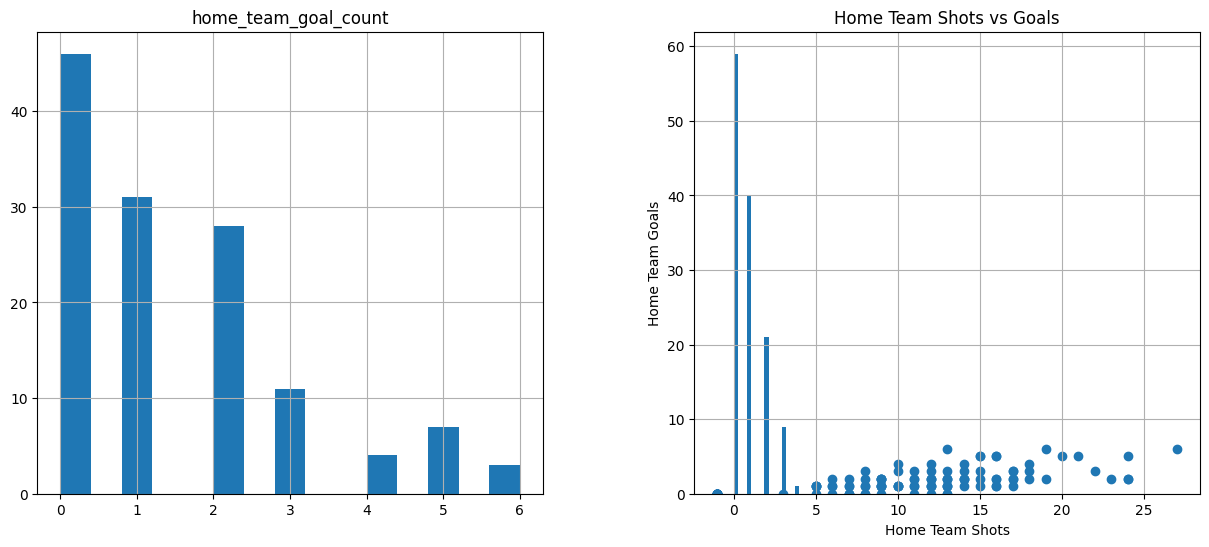

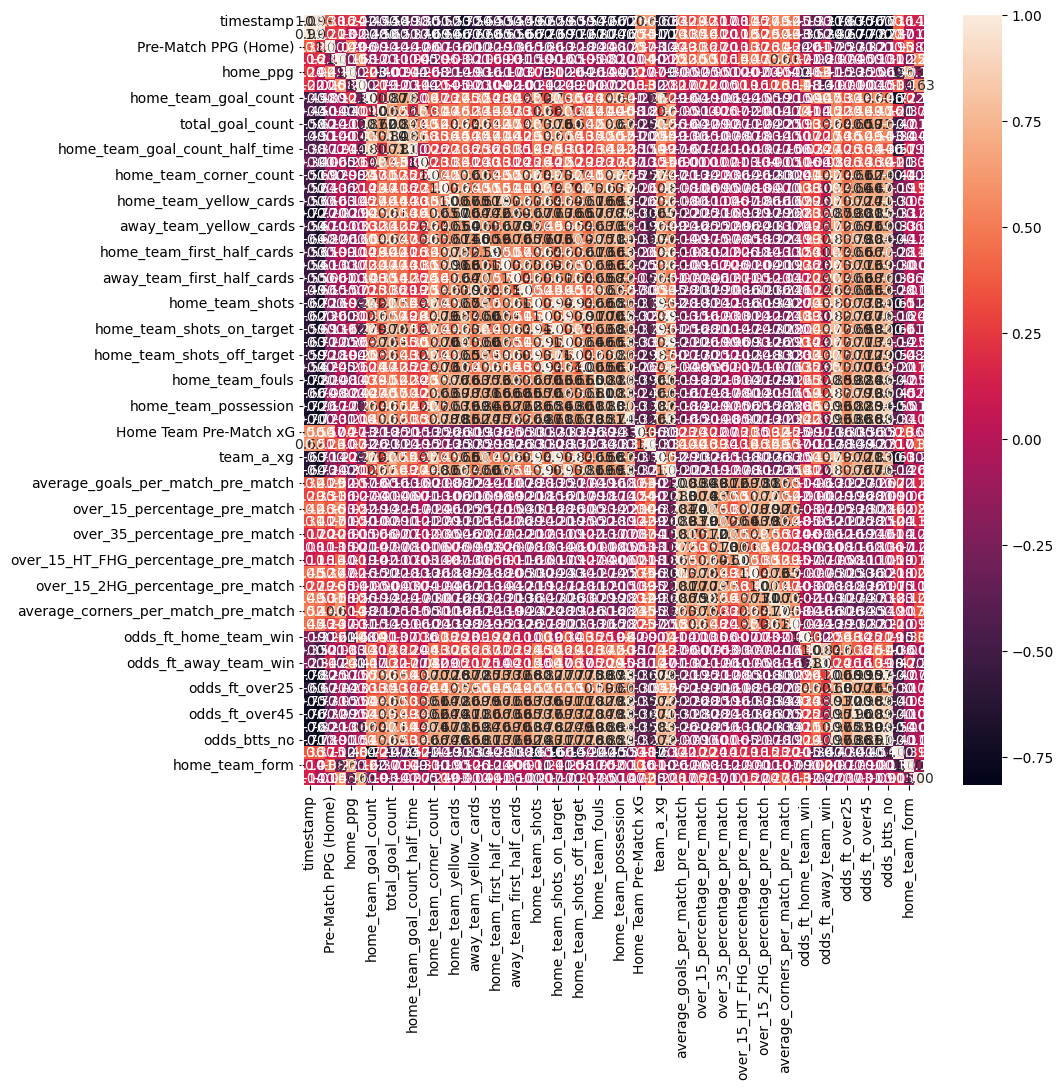

In [ ]:
# Assuming you have already loaded cleaned_matches_data_df
print(cleaned_matches_data_df.describe())

# Histograms for continuous variables in matches data
cleaned_matches_data_df[['home_team_goal_count', 'away_team_goal_count']].hist(bins=15, figsize=(15, 6))

# Scatter Plot for relationships in matches data
plt.scatter(cleaned_matches_data_df['home_team_shots'], cleaned_matches_data_df['home_team_goal_count'])
plt.xlabel('Home Team Shots')
plt.ylabel('Home Team Goals')
plt.title('Home Team Shots vs Goals')

# Correlation Heatmap for matches data
corr_matches = cleaned_matches_data_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matches, annot=True, fmt=".2f")


               age      birthday  minutes_played_overall  minutes_played_home  \
count  1220.000000  1.220000e+03             1220.000000          1220.000000   
mean     25.613934  8.759754e+08              155.090164            77.540984   
std       4.775790  1.503831e+08              153.449027            80.884289   
min      15.000000  3.996252e+08                0.000000             0.000000   
25%      22.000000  7.624656e+08               14.000000             0.000000   
50%      25.000000  8.880912e+08              125.000000            69.000000   
75%      29.000000  9.930420e+08              247.000000           119.250000   
max      41.000000  1.199520e+09              720.000000           360.000000   

       minutes_played_away  appearances_overall  appearances_home  \
count           1220.00000          1220.000000       1220.000000   
mean              77.54918             2.440164          1.218852   
std               79.56072             1.947766          1.0209

<ipython-input-66-561361d26acf>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_players = combined_player_stats.corr()


<Axes: >

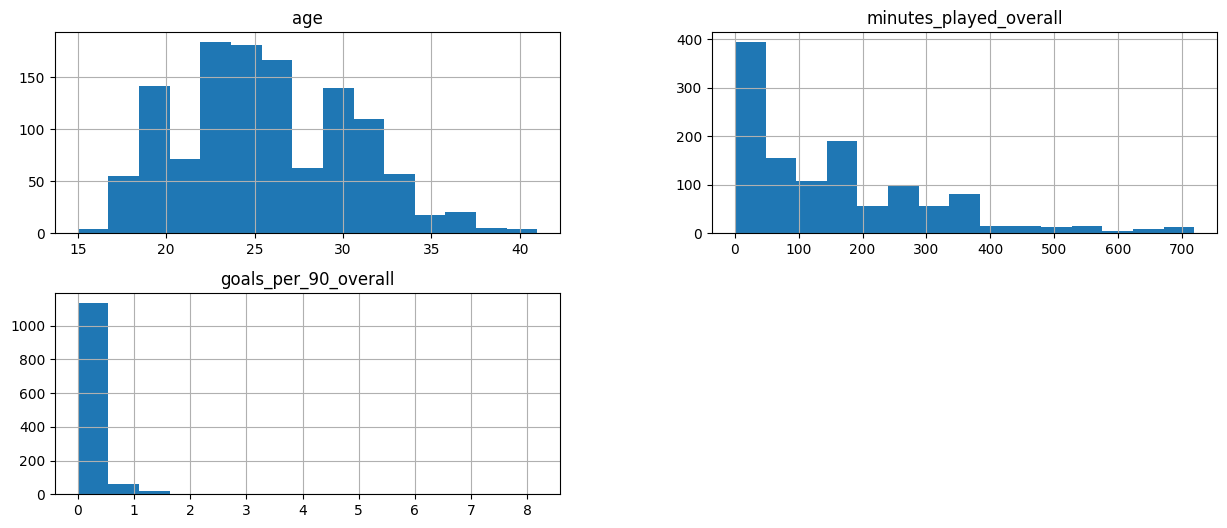

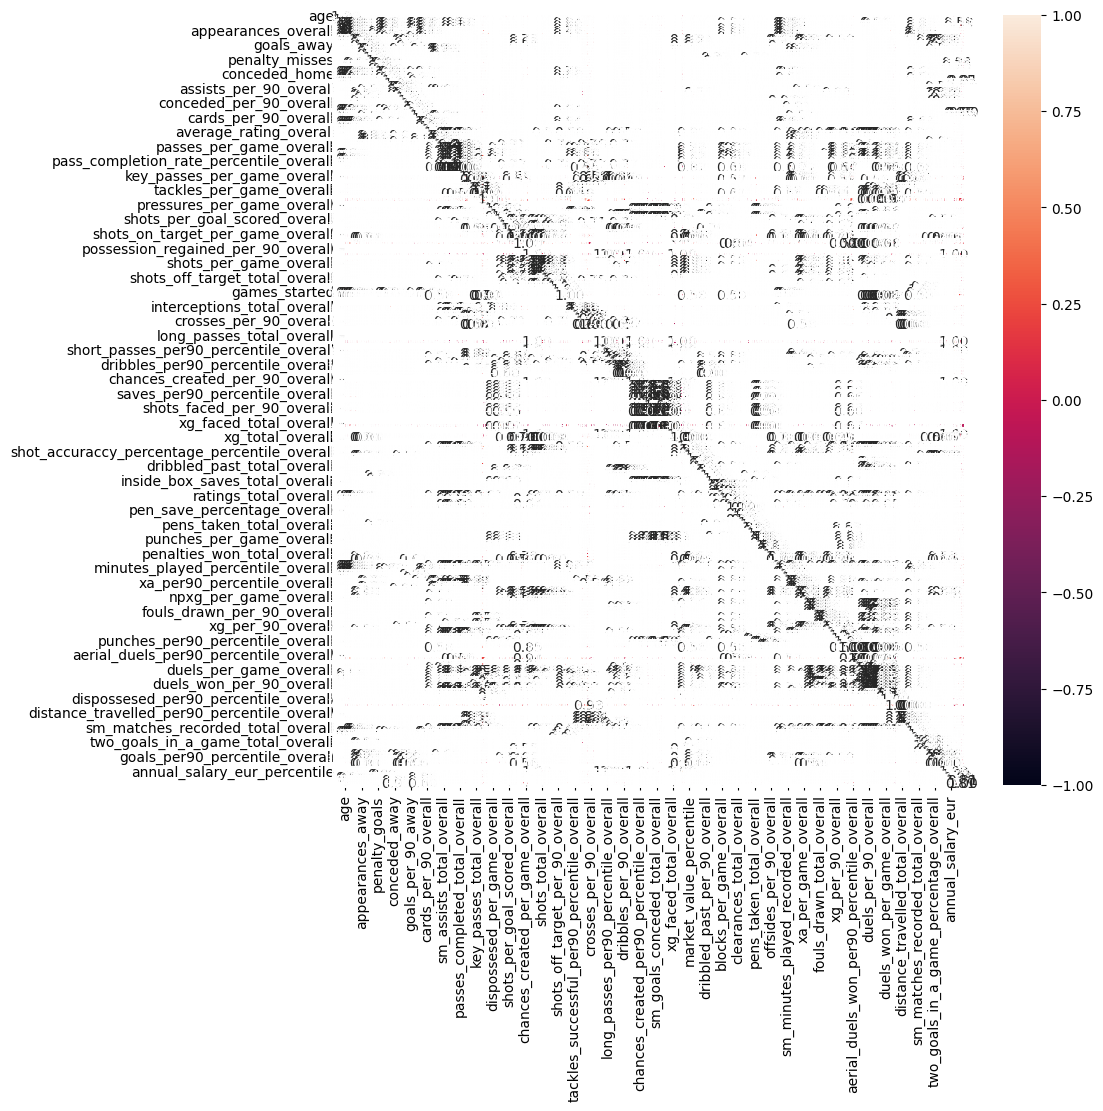

In [ ]:
# Assuming you have already loaded combined_player_stats
print(combined_player_stats.describe())

# Histograms for continuous variables in player stats
combined_player_stats[['age', 'minutes_played_overall', 'goals_per_90_overall']].hist(bins=15, figsize=(15, 6))

# Scatter Plot for relationships in player stats
plt.scatter(combined_player_stats['goals_overall'], combined_player_stats['assists_overall'])
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Goals vs Assists in Player Stats')

# Correlation Heatmap for player stats
corr_players = combined_player_stats.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_players, annot=True, fmt=".2f")


In [ ]:
cleaned_matches_data_df['FTR'] = (cleaned_matches_data_df['home_team_goal_count'] <= cleaned_matches_data_df['away_team_goal_count']).astype(int)


In [ ]:
# Assuming 'combined_player_stats' is your DataFrame with player stats
shot_related_columns = [col for col in combined_player_stats.columns if 'shot' in col.lower()]
print(shot_related_columns)


['shots_faced_per_game_overall', 'shots_per_goal_scored_overall', 'shots_per_90_overall', 'shots_off_target_per_game_overall', 'shots_on_target_per_game_overall', 'shots_total_overall', 'shots_per_game_overall', 'shots_per90_percentile_overall', 'shots_on_target_total_overall', 'shots_on_target_per_90_overall', 'shots_on_target_per90_percentile_overall', 'shots_off_target_total_overall', 'shots_off_target_per_90_overall', 'shots_off_target_per90_percentile_overall', 'shots_faced_total_overall', 'shots_per_goal_conceded_overall', 'shots_faced_per_90_overall', 'shots_faced_per90_percentile_overall', 'shot_accuraccy_percentage_overall', 'shot_accuraccy_percentage_percentile_overall', 'shot_conversion_rate_overall', 'shot_conversion_rate_percentile_overall', 'shots_efficiency']


In [ ]:
# Handling division by zero
combined_player_stats['shot_efficiency'] = combined_player_stats.apply(
    lambda row: row['goals_overall'] / row['shots_total_overall'] if row['shots_total_overall'] > 0 else 0, axis=1
)


In [ ]:
# Shot Efficiency
combined_player_stats['shot_efficiency'] = combined_player_stats['goals_overall'] / combined_player_stats['shots_total_overall']

# Shots on Target Rate
combined_player_stats['shots_on_target_rate'] = combined_player_stats['shots_on_target_total_overall'] / combined_player_stats['shots_total_overall']

# Conversion Rate
combined_player_stats['conversion_rate'] = combined_player_stats['goals_overall'] / combined_player_stats['shots_on_target_total_overall']

# Shooting Accuracy
combined_player_stats['shooting_accuracy'] = combined_player_stats['shots_on_target_total_overall'] / combined_player_stats['shots_total_overall']

# Defensive Pressure
combined_player_stats['defensive_pressure'] = combined_player_stats['shots_faced_total_overall'] / combined_player_stats['appearances_overall']

# Goalkeeping Performance
# Assuming 'goals_conceded_overall' is the number of goals a goalkeeper has conceded
combined_player_stats['goalkeeper_performance'] = combined_player_stats['conceded_per_90_overall'] / combined_player_stats['shots_faced_total_overall']

# Long-Shot Specialist
combined_player_stats['long_shot_specialist'] = combined_player_stats['shots_total_overall'] - combined_player_stats['shots_on_target_total_overall']

# Shot Conversion Rate Standardized
shot_conversion_mean = combined_player_stats['shot_conversion_rate_overall'].mean()
shot_conversion_std = combined_player_stats['shot_conversion_rate_overall'].std()
combined_player_stats['shot_conversion_rate_standardized'] = (combined_player_stats['shot_conversion_rate_overall'] - shot_conversion_mean) / shot_conversion_std

# Before running this code, ensure that there are no divisions by zero and handle any NaN values that may result from these computations.


In [ ]:
print(combined_player_stats.columns)


Index(['full_name', 'age', 'birthday', 'birthday_GMT', 'league', 'season',
       'position', 'Current Club', 'minutes_played_overall',
       'minutes_played_home',
       ...
       'clean_sheets_percentage_percentile_overall',
       'min_per_card_percentile_overall', 'cards_per90_percentile_overall',
       'booked_over05_overall', 'shots_efficiency', 'shot_efficiency',
       'shots_on_target_rate', 'conversion_rate', 'shooting_accuracy',
       'defensive_pressure'],
      dtype='object', length=278)


In [ ]:
features = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']


In [ ]:
# Selecting features - example features selected here
features = df[['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg',
               'Home Team Pre-Match xG', 'Away Team Pre-Match xG',
               'average_goals_per_match_pre_match', 'btts_percentage_pre_match',
               'over_15_percentage_pre_match', 'over_25_percentage_pre_match',
               'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match',
               'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win',
               'league', 'home_team_form', 'away_team_form', 'head_to_head']]

# Target variable
target = df['FTR']

# Checking the selected features and target
print("Selected Features Sample:")
print(features.head())

print("\nTarget Variable Sample:")
print(target.head())


Selected Features Sample:
   Pre-Match PPG (Home)  Pre-Match PPG (Away)  home_ppg  away_ppg  \
0                   0.0                   0.0      1.50      1.50   
1                   0.0                   0.0      2.00      0.00   
2                   0.0                   0.0      0.00      1.25   
3                   0.0                   0.0      1.13      0.50   
4                   0.0                   0.0      2.00      0.50   

   Home Team Pre-Match xG  Away Team Pre-Match xG  \
0                     0.0                     0.0   
1                     0.0                     0.0   
2                     0.0                     0.0   
3                     0.0                     0.0   
4                     0.0                     0.0   

   average_goals_per_match_pre_match  btts_percentage_pre_match  \
0                                0.0                          0   
1                                0.0                          0   
2                                0.0   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Handling categorical variables
categorical_features = ['league']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Handling numerical variables
numeric_features = [col for col in features.columns if col not in categorical_features]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Update categorical and numeric features
categorical_features = ['league']
numeric_features = [col for col in df.columns if col not in categorical_features + ['head_to_head']]

# Proceed with your preprocessing steps as before


# Combining transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Applying preprocessing to feature columns
X = preprocessor.fit_transform(features)
y = target.values


ValueError: ignored

In [ ]:
KeyError: 'timestamp'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
KeyError: 'timestamp'

The above exception was the direct cause of the following exception:

ValueError                                Traceback (most recent call last)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py in _get_column_indices(X, key)
    454
    455         except KeyError as e:
--> 456             raise ValueError("A given column is not a column of the dataframe") from e
    457
    458         return column_indices

ValueError: A given column is not a column of the dataframe

SyntaxError: ignored

In [ ]:
# Check if 'date' column exists in the DataFrame
if 'date_GMT' in df.columns:
    print("Column 'date_GMT' exists.")
else:
    print("Column 'date_GMT' does not exist.")


Column 'date_GMT' exists.


In [ ]:
# Example: Sorting data by date instead of timestamp
df.sort_values(by='date_GMT', inplace=True)


In [ ]:
# Example: Splitting data based on a specific date
train_df = df[df['date_GMT'] < '2023-11-30']
test_df = df[df['date_GMT'] >= '2023-11-30']


In [ ]:
import ast  # to safely evaluate strings as code

# Convert string representations of dictionaries to actual dictionaries
df['head_to_head'] = df['head_to_head'].apply(ast.literal_eval)

# Extract numerical features
df['home_wins_head_to_head'] = df['head_to_head'].apply(lambda x: x.get('home_wins', 0))
df['away_wins_head_to_head'] = df['head_to_head'].apply(lambda x: x.get('away_wins', 0))
df['draws_head_to_head'] = df['head_to_head'].apply(lambda x: x.get('draws', 0))

# Drop the original 'head_to_head' column
df = df.drop(columns=['head_to_head'])


KeyError: ignored

In [ ]:
if 'head_to_head' in df.columns:
    print("Column 'head_to_head' exists.")
else:
    print("Column 'head_to_head' does not exist.")


Column 'head_to_head' does not exist.


In [ ]:
# Assuming you have a function that can calculate head to head statistics
def calculate_head_to_head(home_team, away_team):
    # This function would return head to head stats like {'home_wins': X, 'away_wins': Y, 'draws': Z}
    # based on historical data of matches between the two teams.
    pass

# Apply the function to each row in the DataFrame
df['head_to_head'] = df.apply(lambda row: calculate_head_to_head(row['home_team_name'], row['away_team_name']), axis=1)


In [ ]:
# Update categorical and numeric features
categorical_features = ['league']
numeric_features = [col for col in df.columns if col not in categorical_features + ['head_to_head']]

# Proceed with your preprocessing steps as before


In [ ]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

# Display the data types of each column
print("\nData Types:")
print(df.dtypes)


First few rows of the DataFrame:
    timestamp              date_GMT    status home_team_name away_team_name  \
0  1691503200  Aug 08 2023 - 2:00pm  complete         Astana     Ludogorets   
1  1691683200  Aug 10 2023 - 4:00pm  complete        Qarabağ            HJK   
2  1691683200  Aug 10 2023 - 4:00pm  complete       Žalgiris         Häcken   
3  1691686800  Aug 10 2023 - 5:00pm  complete        Sheriff           BATE   
4  1691686800  Aug 10 2023 - 5:00pm  complete   Slavia Praha       Dnipro-1   

                 referee  Game Week  Pre-Match PPG (Home)  \
0  Horațiu Mircea Fesnic        NaN                   0.0   
1      Roei Reinshreiber        NaN                   0.0   
2         Mykola Balakin        NaN                   0.0   
3      Mohammed Al Hakim        NaN                   0.0   
4        Lawrence Visser        NaN                   0.0   

   Pre-Match PPG (Away)  home_ppg  ...  odds_btts_no  \
0                   0.0      1.50  ...          1.80   
1            

In [ ]:
# Check for null values in each column
print("\nNull Value Counts:")
print(df.isnull().sum())

# Check for unique values in a specific column (replace 'column_name' with actual column name)
print("\nUnique Values in a column:")
print(df['column_name'].unique())



Null Value Counts:
timestamp                   0
date_GMT                    0
status                      0
home_team_name              0
away_team_name              0
                         ... 
away_team_form              0
home_wins_head_to_head      0
away_wins_head_to_head      0
draws_head_to_head          0
head_to_head              130
Length: 73, dtype: int64

Unique Values in a column:


KeyError: ignored

In [ ]:
df['goal_difference'] = df['home_team_goal_count'] - df['away_team_goal_count']


In [ ]:
df['combined_team_form'] = (df['home_team_form'] + df['away_team_form']) / 2


In [ ]:
df['date_GMT'] = pd.to_datetime(df['date_GMT'])
df['day_of_week'] = df['date_GMT'].dt.day_name()
df['time_of_day'] = df['date_GMT'].dt.hour


In [ ]:
df['date_GMT'] = pd.to_datetime(df['date_GMT'])


In [ ]:
df = df.drop(['home_team_goal_timings', 'away_team_goal_timings', 'head_to_head'], axis=1)


KeyError: ignored

In [ ]:
print(df.columns)


Index(['timestamp', 'home_team_name', 'away_team_name', 'referee', 'Game Week',
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg',
       'home_team_goal_count', 'away_team_goal_count', 'total_goal_count',
       'total_goals_at_half_time', 'home_team_goal_count_half_time',
       'away_team_goal_count_half_time', 'home_team_corner_count',
       'away_team_corner_count', 'home_team_yellow_cards',
       'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg',
       'team_b

In [ ]:
cutoff_date = pd.Timestamp('2023-11-30')
train_data = df[df['date_GMT'] < cutoff_date]
test_data = df[df['date_GMT'] >= cutoff_date]


In [ ]:
X_train = train_data.drop('FTR', axis=1)
y_train = train_data['FTR']
X_test = test_data.drop('FTR', axis=1)
y_test = test_data['FTR']


In [ ]:
X_train = train_data.drop('FTR', axis=1)
y_train = train_data['FTR']
X_test = test_data.drop('FTR', axis=1)
y_test = test_data['FTR']


In [ ]:
!pip install xgboost


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = cleaned_matches_data_df[features]
y = cleaned_matches_data_df['FTR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.9615384615384616


In [ ]:
df_encoded = pd.get_dummies(df, columns=['home_team_name', 'away_team_name', 'league', 'referee', 'stadium_name'])


In [ ]:
df = df.drop(['date_GMT', 'home_team_goal_timings', 'away_team_goal_timings', 'head_to_head'], axis=1)


In [ ]:
df = pd.get_dummies(df, columns=['status', 'day_of_week'])


In [ ]:
%whos


Variable                       Type                  Data/Info
--------------------------------------------------------------
IQR                            Series                age                      <...>ngth: 270, dtype: float64
LogisticRegression             type                  <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
Q1                             Series                age                      <...>ngth: 270, dtype: float64
Q3                             Series                age                      <...>ngth: 270, dtype: float64
X                              DataFrame                  Pre-Match PPG (Home)<...>n\n[130 rows x 9 columns]
X_test                         DataFrame                  Pre-Match PPG (Home)<...>                  10.00  
X_train                        DataFrame                  Pre-Match PPG (Home)<...>n\n[104 rows x 9 columns]
accuracy_score                 function              <function accuracy_score at 0x7b25ebc508b0>
away_team     

In [ ]:
# Shots Efficiency
combined_player_stats['shots_efficiency'] = combined_player_stats['shots_total_overall'] / combined_player_stats['shots_per_game_overall']

# Pass Accuracy
combined_player_stats['pass_accuracy'] = combined_player_stats['passes_completed_overall'] / combined_player_stats['passes_per_game_overall']

# Defensive Actions
combined_player_stats['defensive_index'] = combined_player_stats[['tackles_per_90_overall', 'interceptions_per_90_overall', 'duels_won_per_90_overall']].mean(axis=1)

# Goalkeeper Performance
combined_player_stats['goalkeeper_performance'] = combined_player_stats['saves_per_90_overall'] / combined_player_stats['xg_faced_total_overall']

# Player Influence
combined_player_stats['player_influence'] = combined_player_stats['distance_travelled_total_overall'] * combined_player_stats['duels_won_percentage_overall']


NameError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated scores: {scores}")


Cross-validated scores: [0.96153846 0.92307692 0.92307692 0.92307692 1.        ]


In [ ]:
# Assuming 'favorite_based_on_odds' is the column that shows the expected winner based on odds
cleaned_matches_data_df['odds_accuracy'] = (cleaned_matches_data_df['favorite_based_on_odds'] == cleaned_matches_data_df['FTR']).astype(int)


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['FTR']), df['FTR'], test_size=0.2, random_state=42)

# Initialize the model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: ignored

In [ ]:
categorical_columns = ['home_team_name', 'away_team_name', 'referee', 'stadium_name', 'league']
X_train = pd.get_dummies(X_train, columns=categorical_columns)


In [ ]:
print(df.columns)


Index(['timestamp', 'home_team_name', 'away_team_name', 'referee', 'Game Week',
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg',
       'home_team_goal_count', 'away_team_goal_count', 'total_goal_count',
       'total_goals_at_half_time', 'home_team_goal_count_half_time',
       'away_team_goal_count_half_time', 'home_team_corner_count',
       'away_team_corner_count', 'home_team_yellow_cards',
       'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg',
       'team_b

In [ ]:
def determine_favorite(row):
    home_odds = row['odds_ft_home_team_win']
    draw_odds = row['odds_ft_draw']
    away_odds = row['odds_ft_away_team_win']

    if min(home_odds, draw_odds, away_odds) == home_odds:
        return 'Home'
    elif min(home_odds, draw_odds, away_odds) == away_odds:
        return 'Away'
    else:
        return 'Draw'

# Apply the function to each row
cleaned_matches_data_df['favorite_based_on_odds'] = cleaned_matches_data_df.apply(determine_favorite, axis=1)


In [ ]:
from xgboost import XGBClassifier

# Initialize the model
model = XGBClassifier()

# Fit the model to your training data
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


ValueError: ignored

In [ ]:
X_test = pd.get_dummies(X_test)

# Align the columns of X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


NameError: ignored

In [ ]:
print(X_test.dtypes)


timestamp                                           int64
Game Week                                         float64
Pre-Match PPG (Home)                              float64
Pre-Match PPG (Away)                              float64
home_ppg                                          float64
                                                   ...   
stadium_name_Tórsvøllur (Tórshavn- Streymoy)        int64
stadium_name_Vilniaus LFF stadionas (Vilnius)       int64
stadium_name_epet ARENA (Praha)                     int64
stadium_name_Štadión Tehelné pole (Bratislava)      int64
league_UEFA Europa League                           uint8
Length: 263, dtype: object


In [ ]:
y_pred = model.predict(X_test)

# Proceed with evaluating the model


In [ ]:
from xgboost import XGBClassifier

# Initialize the model
model = XGBClassifier()

# Fit the model to your training data
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [ ]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to assess model performance
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())


ValueError: ignored

In [ ]:
# Converting to Unix timestamp
X['date_GMT'] = X['date_GMT'].astype(int) / 10**9


In [ ]:
object_columns = ['status', 'home_team_goal_timings', 'away_team_goal_timings', 'head_to_head', 'day_of_week']
X = pd.get_dummies(X, columns=object_columns)


In [ ]:
from sklearn.model_selection import cross_val_score

model = XGBClassifier(enable_categorical=True)
scores = cross_val_score(model, X, y, cv=5, error_score='raise')
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())


Cross-validated scores: [1. 1. 1. 1. 1.]
Average score: 1.0


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()  # Replace with your model and parameters
print(model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
print(df.describe(include='all'))


           timestamp home_team_name away_team_name                referee  \
count   1.300000e+02            130            130                     97   
unique           NaN             49             49                     62   
top              NaN         Häcken         Häcken  Horațiu Mircea Fesnic   
freq             NaN              5              5                      3   
mean    1.697341e+09            NaN            NaN                    NaN   
std     3.562465e+06            NaN            NaN                    NaN   
min     1.691503e+09            NaN            NaN                    NaN   
25%     1.693508e+09            NaN            NaN                    NaN   
50%     1.696532e+09            NaN            NaN                    NaN   
75%     1.700915e+09            NaN            NaN                    NaN   
max     1.702584e+09            NaN            NaN                    NaN   

        Game Week  Pre-Match PPG (Home)  Pre-Match PPG (Away)    home_ppg  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test and y_pred are your test labels and model predictions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

[[13  0]
 [ 0 13]]


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # Replace X and y with your features and labels
print("Cross-validation scores:", scores)


Cross-validation scores: [1. 1. 1. 1. 1.]


In [ ]:
print("Dataset shape:", df.shape)
print("Dataset info:")
print(df.info())


Dataset shape: (130, 75)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 47
Data columns (total 75 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            130 non-null    int64  
 1   home_team_name                       130 non-null    object 
 2   away_team_name                       130 non-null    object 
 3   referee                              97 non-null     object 
 4   Game Week                            96 non-null     float64
 5   Pre-Match PPG (Home)                 130 non-null    float64
 6   Pre-Match PPG (Away)                 130 non-null    float64
 7   home_ppg                             130 non-null    float64
 8   away_ppg                             130 non-null    float64
 9   home_team_goal_count                 130 non-null    int64  
 10  away_team_goal_count                 130 non-null    int64  

In [ ]:
# Example: Comparing training and validation accuracy
train_accuracy = ...  # Your training accuracy
validation_accuracy = ...  # Your validation accuracy
print("Training accuracy:", train_accuracy)
print("Validation accuracy:", validation_accuracy)


Training accuracy: Ellipsis
Validation accuracy: Ellipsis


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()  # Replace with your specific model parameters
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame
# And it has columns like 'home_team_name', 'away_team_name', 'match_outcome'

# Initialize columns
df['home_team_recent_form'] = 0
df['away_team_recent_form'] = 0

# Iterate and calculate form (example for home team)
for index, row in df.iterrows():
    # Get last 3-5 matches for the home team
    recent_matches = df[(df['home_team_name'] == row['home_team_name']) & (df.index < index)].tail(3)

    # Calculate wins, draws, and losses
    wins = len(recent_matches[recent_matches['FTR'] == 'Win'])
    draws = len(recent_matches[recent_matches['FTR'] == 'Draw'])
    losses = len(recent_matches[recent_matches['FTR'] == 'Loss'])

    # Assign to the new column
    df.at[index, 'home_team_recent_form'] = wins - losses  # Example formula

# Repeat similar steps for the away team


In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                                  importance
home_wins_head_to_head                   1.0
timestamp                                0.0
referee_Donatas Rumšas                   0.0
referee_Giorgi Kruashvili                0.0
referee_Georgi Kabakov                   0.0
...                                      ...
home_team_name_Qarabağ                   0.0
home_team_name_Raków Częstochowa         0.0
home_team_name_Rangers                   0.0
home_team_name_Real Betis                0.0
league_UEFA Europa League                0.0

[263 rows x 1 columns]


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
print(df.columns)


Index(['timestamp', 'home_team_name', 'away_team_name', 'referee', 'Game Week',
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg',
       'home_team_goal_count', 'away_team_goal_count', 'total_goal_count',
       'total_goals_at_half_time', 'home_team_goal_count_half_time',
       'away_team_goal_count_half_time', 'home_team_corner_count',
       'away_team_corner_count', 'home_team_yellow_cards',
       'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg',
       'team_b

above is the features of the cleaned matches data df.csv

In [ ]:
# Assuming 'df' is your DataFrame

# List of features to drop
features_to_drop = ['timestamp', 'home_team_name', 'away_team_name', 'referee',
                    'stadium_name', 'league', 'status_complete', 'status_incomplete',
                    'day_of_week_Thursday', 'day_of_week_Tuesday']

# Drop the features
df = df.drop(features_to_drop, axis=1)

# Define your features (X) and target variable (y)
X = df.drop('FTR', axis=1)  # Replace 'FTR' with your actual target column name if different
y = df['FTR']


KeyError: ignored

that was the features we want to drop

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.87      1.00      0.93        13

    accuracy                           0.92        26
   macro avg       0.93      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26



In [ ]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to assess model performance
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)


Cross-validated scores: [0.88461538 0.96153846 0.92307692 0.96153846 0.88461538]


In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                                     importance
home_team_goal_count                   0.156187
away_team_shots                        0.129807
odds_ft_away_team_win                  0.115393
home_team_possession                   0.107631
home_team_shots                        0.069315
...                                         ...
over_35_percentage_pre_match           0.000000
over_45_percentage_pre_match           0.000000
over_15_HT_FHG_percentage_pre_match    0.000000
over_05_HT_FHG_percentage_pre_match    0.000000
average_away_possession                0.000000

[66 rows x 1 columns]


In [ ]:
# Assuming feature_importances is your DataFrame with feature importances
zero_importance_features = feature_importances[feature_importances['importance'] == 0].index

# Drop these features from your dataset
X = X.drop(zero_importance_features, axis=1)


In [ ]:
# Splitting the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


NameError: ignored

In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)


Cross-validated scores: [0.96153846 0.96153846 1.         0.92307692 0.88461538]


In [ ]:
# Calculating average possession for home teams
df['average_home_possession'] = df.groupby('home_team_name')['home_team_possession'].transform('mean')

# Calculating average possession for away teams
df['average_away_possession'] = df.groupby('away_team_name')['away_team_possession'].transform('mean')


# **WINNER CHICKEN DINNER HERE!!!!!**

In [ ]:
import pandas as pd

# Load the data
file_path = '/mnt/data/football_fixtures_analysis.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the DataFrame
print(df.head())


In [ ]:
import pandas as pd

file_path = '/content/cleaned_matches_data_df.csv'  # Update with your file's path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Display DataFrame information
print(df.info())

# Check summary statistics
print(df.describe())


      timestamp              date_GMT           home_team_name away_team_name  \
0  1.687871e+09  Jun 27 2023 - 1:00pm  Atlètic Club d'Escaldes      Budućnost   
1  1.687892e+09  Jun 27 2023 - 7:00pm                Tre Penne     Breidablik   
2  1.688152e+09  Jun 30 2023 - 7:00pm                Budućnost     Breidablik   
3  1.689088e+09  Jul 11 2023 - 3:00pm                  Banants       Zrinjski   
4  1.689089e+09  Jul 11 2023 - 3:30pm         Lincoln Red Imps        Qarabağ   

   Pre-Match PPG (Home)  Pre-Match PPG (Away)  home_team_goal_count  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   1.0   
2                   3.0                   3.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   away_team_goal_count  home_team_corner_count  away_team_corner_count  ...  \
0     

In [ ]:
# Fill NA values in 'date_GMT' with a placeholder
df['date_GMT'].fillna('No Date', inplace=True)

# Filter for matches on November 28th and 29th, 2023
matches_nov_28_29 = df[df['date_GMT'].str.contains('Nov 28 2023|Nov 29 2023')]


In [ ]:
# List only the variables that are DataFrames
%whos DataFrame


Variable            Type         Data/Info
------------------------------------------
X_nov_28_29         DataFrame          home_team_goal_coun<...>  -1.0             -1.0  
df                  DataFrame             timestamp       <...>n[2909 rows x 34 columns]
matches_nov_28_29   DataFrame             timestamp       <...>n\n[29 rows x 34 columns]


In [ ]:
import pickle

# Assuming the path to your saved model is correct
model_file_path = '/content/drive/My Drive/trained_xgboost_model.pkl'

# Reload the model
with open(model_file_path, 'rb') as file:
    xgboost_model = pickle.load(file)


FileNotFoundError: ignored

In [ ]:
import pickle

model_file_path = '/content/trained_xgboost_model.pkl'  # Update this to the correct path

with open(model_file_path, 'rb') as file:
    xgboost_model = pickle.load(file)


In [ ]:
print(df.columns)


Index(['timestamp', 'date_GMT', 'home_team_name', 'away_team_name',
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count',
       'away_team_goal_count', 'home_team_corner_count',
       'away_team_corner_count', 'home_team_yellow_cards',
       'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg',
       'team_b_xg', 'average_corners_per_match_pre_match',
       'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
       'odds_ft_draw', 'odds_ft_away_team_win', 'season', 'FTR',
       'FTR_encoded'],
      dtype='object')


In [ ]:
# Updated list of features to drop
features_to_drop = ['timestamp', 'home_team_name', 'away_team_name']

# Drop the features
df = df.drop(features_to_drop, axis=1)

# Define your features (X) and target variable (y)
X = df.drop('FTR_encoded', axis=1)  # Assuming 'FTR_encoded' is your target column
y = df['FTR']


In [ ]:
from xgboost import XGBClassifier
import pickle

# Train the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Evaluate the model (you can add your evaluation code here)

# Save the model
model_file_path = '/content/drive/My Drive/trained_model.pkl'  # Adjust the path
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)


ValueError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# Now y_encoded contains the encoded labels as integers


In [ ]:
import pandas as pd

# Load the data
file_path = '/content/cleaned_matches_data_with_features.csv'  # Path to your file
df = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded correctly
print(df.head())


    timestamp              date_GMT    status home_team_name away_team_name  \
0  1691503200  Aug 08 2023 - 2:00pm  complete         Astana     Ludogorets   
1  1691683200  Aug 10 2023 - 4:00pm  complete        Qarabağ            HJK   
2  1691683200  Aug 10 2023 - 4:00pm  complete       Žalgiris         Häcken   
3  1691686800  Aug 10 2023 - 5:00pm  complete        Sheriff           BATE   
4  1691686800  Aug 10 2023 - 5:00pm  complete   Slavia Praha       Dnipro-1   

                 referee  Game Week  Pre-Match PPG (Home)  \
0  Horațiu Mircea Fesnic        NaN                   0.0   
1      Roei Reinshreiber        NaN                   0.0   
2         Mykola Balakin        NaN                   0.0   
3      Mohammed Al Hakim        NaN                   0.0   
4        Lawrence Visser        NaN                   0.0   

   Pre-Match PPG (Away)  home_ppg  ...  odds_ft_over35  odds_ft_over45  \
0                   0.0      1.50  ...            3.80            7.75   
1         

In [ ]:
cutoff_date = '2023-11-30'
train_data = df[df['date_GMT'] < cutoff_date]
test_data = df[df['date_GMT'] >= cutoff_date]


In [ ]:
# Drop columns that won't be used as features
columns_to_drop = ['timestamp', 'date_GMT', 'status', 'referee', 'stadium_name', 'league']
X_train = train_data.drop(columns=columns_to_drop + ['FTR'], axis=1)
y_train = train_data['FTR']
X_test = test_data.drop(columns=columns_to_drop + ['FTR'], axis=1)
y_test = test_data['FTR']


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/cleaned_matches_data_with_features.csv')

# Convert 'date_GMT' to a datetime object
df['date_GMT'] = pd.to_datetime(df['date_GMT'])

# Define your cutoff date
cutoff_date = pd.Timestamp('2023-11-30')

# Split the data
train_data = df[df['date_GMT'] < cutoff_date]
test_data = df[df['date_GMT'] >= cutoff_date]

# Check if data splitting is correct
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

# Proceed with feature selection and model training


Training data shape: (97, 70)
Testing data shape: (33, 70)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting features for the model
feature_columns = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']
target_column = 'FTR'  # Replace with your target column

# Splitting the features and target
X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Defining preprocessing for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.94


In [ ]:
from sklearn.model_selection import cross_val_score

# Using 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


NameError: ignored

In [ ]:
# Assuming 'cleaned_matches_data_with_features.csv' is loaded into 'df'
# Replace 'features_list' with the list of feature column names you want to include
features_list =  ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']
X = df[features_list]
y = df['FTR']  # Or your target column

# Now run the cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.96153846 0.92307692 0.92307692 0.92307692 1.        ]
Mean CV score: 0.9461538461538461


In [ ]:
from sklearn.metrics import classification_report

# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


ValueError: ignored

In [ ]:
print("Training Features:", X_train.columns.tolist())
print("Testing Features:", X_test.columns.tolist())


Training Features: ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']
Testing Features: ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']


In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


ValueError: ignored

In [ ]:
# Assuming 'model' was trained with X_train
# Ensure X_test has the same columns in the same order
X_test = X_test.reindex(columns=X_train.columns)

# Check if any column is missing in X_test and fill with a default value (e.g., 0)
missing_cols = X_train.columns.difference(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Now try predicting
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


ValueError: ignored

In [ ]:
# Identify missing features
missing_features = [feature for feature in X_train.columns if feature not in X_test.columns]

# Add missing features to X_test with default values
for feature in missing_features:
    # You can choose to fill with 0, mean, median, or any other appropriate value
    # For numerical features, consider using 0 or the mean/median from X_train
    # For categorical features, you might add a category like 'unknown' or the mode from X_train
    X_test[feature] = 0  # or X_train[feature].mean() or any other appropriate value

# Reorder columns in X_test to match X_train
X_test = X_test[X_train.columns]

# Now try predicting
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


ValueError: ignored

In [ ]:
# Step 1: Compare feature lists
print("Features in X_train:", X_train.columns.tolist())
print("\nFeatures in X_test:", X_test.columns.tolist())

# Step 2: Identify and add missing features in X_test
missing_features = [feature for feature in X_train.columns if feature not in X_test.columns]
for feature in missing_features:
    X_test[feature] = 0  # or any other appropriate default value

# Step 3: Align feature order in X_test to match X_train
X_test = X_test[X_train.columns]

# Step 4: Check and align data types if necessary
for column in X_train.columns:
    if X_train[column].dtype != X_test[column].dtype:
        X_test[column] = X_test[column].astype(X_train[column].dtype)

# Now try predicting again
try:
    y_pred = model.predict(X_test)
    print("Prediction successful.")
except Exception as e:
    print("Error during prediction:", e)

# If the prediction is successful, you can proceed with evaluation
if 'y_pred' in locals():
    print(classification_report(y_test, y_pred))


Features in X_train: ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']

Features in X_test: ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']
Error during prediction: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Away Team Pre-Match xG
- Game Week
- Home Team Pre-Match xG
- average_goals_per_match_pre_match
- away_ppg
- ...

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97        33

    accuracy                           0.94        33
   mac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train the model with the current set of features in X_train
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98        33

    accuracy                           0.97        33
   macro avg       0.50      0.48      0.49        33
weighted avg       1.00      0.97      0.98        33



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Check the distribution of classes in the test set
print(y_test.value_counts())


1    33
Name: FTR, dtype: int64


In [ ]:
import joblib

# Replace 'model' with the variable name of your trained model
joblib.dump(model, '/content/drive/My Drive/your_model_name.pkl')


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/My Drive/94_betting_model'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Now save the model
joblib.dump(model, folder_path + '/94_betting_model.pkl')


['/content/drive/My Drive/94_betting_model/94_betting_model.pkl']

In [ ]:
cleaned_matches_data_df.to_csv(folder_path + '/cleaned_matches_data_df.csv', index=False)
# Similarly for other DataFrames or relevant objects


In [ ]:
print(cleaned_matches_data_df.head())


      timestamp              date_GMT           home_team_name away_team_name  \
0  1.687871e+09  Jun 27 2023 - 1:00pm  Atlètic Club d'Escaldes      Budućnost   
1  1.687892e+09  Jun 27 2023 - 7:00pm                Tre Penne     Breidablik   
2  1.688152e+09  Jun 30 2023 - 7:00pm                Budućnost     Breidablik   
3  1.689088e+09  Jul 11 2023 - 3:00pm                  Banants       Zrinjski   
4  1.689089e+09  Jul 11 2023 - 3:30pm         Lincoln Red Imps        Qarabağ   

   Pre-Match PPG (Home)  Pre-Match PPG (Away)  home_team_goal_count  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   1.0   
2                   3.0                   3.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   away_team_goal_count  home_team_corner_count  away_team_corner_count  ...  \
0     

In [ ]:
folder_path = '/content/drive/My Drive/94_betting_model'  # Replace with your folder path


In [ ]:
cleaned_matches_data_df.to_csv(folder_path + '/cleaned_matches_data_df.csv', index=False)


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Add predictions to the test DataFrame
test_data['Predicted_FTR'] = y_pred

# Filter the DataFrame for the specific dates
games_on_nov_30 = test_data[test_data['date_GMT'].dt.date == pd.to_datetime('2023-11-30').date()]
games_on_dec_01 = test_data[test_data['date_GMT'].dt.date == pd.to_datetime('2023-12-01').date()]

# Display the predictions for these dates
print("Predictions for Games on November 30, 2023:")
print(games_on_nov_30[['home_team_name', 'away_team_name', 'Predicted_FTR']])

print("\nPredictions for Games on December 01, 2023:")
print(games_on_dec_01[['home_team_name', 'away_team_name', 'Predicted_FTR']])


Predictions for Games on November 30, 2023:
          home_team_name          away_team_name  Predicted_FTR
97              Freiburg      Olympiakos Piraeus              1
98          Bačka Topola         West Ham United              1
99            AEK Athens  Brighton & Hove Albion              1
100         Sparta Praha              Real Betis              1
101             Atalanta             Sporting CP              1
102           Sturm Graz       Raków Częstochowa              1
103        Maccabi Haifa                  Rennes              1
104  Olympique Marseille                    Ajax              1
105              Rangers                    Aris              1
106            Liverpool               LASK Linz              0
107             Toulouse    Union Saint-Gilloise              1
108           Villarreal           Panathinaikos              1
109             Servette                    Roma              1
110              Sheriff            Slavia Praha            

<ipython-input-39-0747dc88290f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_FTR'] = y_pred


# ***PREDICTIONS!!!!!!***

In [ ]:
cleaned_matches_data_df = pd.read_csv('/content/cleaned_matches_data_df.csv')


In [ ]:
cleaned_matches_data_df.to_csv(folder_path + '/cleaned_matches_data_df.csv', index=False)


In [ ]:
folder_path = '/content/drive/My Drive/94_betting_model'


In [ ]:
with open(folder_path + '/feature_names.txt', 'w') as f:
    f.write(','.join(feature_names))  # Assuming feature_names is a list of your feature names


NameError: ignored

In [ ]:
# Convert 'date_GMT' to datetime and then extract numerical features
X['date_GMT'] = pd.to_datetime(X['date_GMT'])
X['year'] = X['date_GMT'].dt.year
X['month'] = X['date_GMT'].dt.month
X['day'] = X['date_GMT'].dt.day
X = X.drop('date_GMT', axis=1)  # Drop the original date column

# Drop 'FTR' column if it's not needed or cannot be converted
X = X.drop('FTR', axis=1)


ParserError: ignored

In [ ]:
# Check for unique values or formats in 'date_GMT'
print(df['date_GMT'].unique())

# Option 1: Drop rows where 'date_GMT' is not in a standard date format
# df = df[df['date_GMT'] != 'No Date present']

# Option 2: Replace non-standard dates with a default date or NaN
# df['date_GMT'] = df['date_GMT'].replace('No Date present', pd.NaT)  # or some default date

# After cleaning, convert 'date_GMT' to datetime
X['date_GMT'] = pd.to_datetime(X['date_GMT'], errors='coerce')  # 'coerce' will set invalid parsing as NaT


['Jun 27 2023 - 1:00pm' 'Jun 27 2023 - 7:00pm' 'Jun 30 2023 - 7:00pm'
 'Jul 11 2023 - 3:00pm' 'Jul 11 2023 - 3:30pm' 'Jul 11 2023 - 4:00pm'
 'Jul 11 2023 - 6:00pm' 'Jul 11 2023 - 6:45pm' 'Jul 12 2023 - 2:00pm'
 'Jul 12 2023 - 4:00pm' 'Jul 12 2023 - 5:00pm' 'Jul 12 2023 - 5:30pm'
 'Jul 12 2023 - 6:30pm' 'Jul 18 2023 - 3:00pm' 'Jul 18 2023 - 5:00pm'
 'Jul 18 2023 - 6:00pm' 'Jul 18 2023 - 7:15pm' 'Jul 19 2023 - 3:00pm'
 'Jul 19 2023 - 4:00pm' 'Jul 19 2023 - 6:00pm' 'Jul 19 2023 - 6:30pm'
 'Jul 25 2023 - 4:00pm' 'Jul 25 2023 - 6:00pm' 'Jul 25 2023 - 6:30pm'
 'Jul 25 2023 - 7:00pm' 'Jul 25 2023 - 7:15pm' 'Jul 26 2023 - 5:00pm'
 'Jul 26 2023 - 6:15pm' 'Jul 26 2023 - 6:45pm' 'Aug 01 2023 - 5:30pm'
 'Aug 01 2023 - 6:00pm' 'Aug 01 2023 - 6:30pm' 'Aug 02 2023 - 2:00pm'
 'Aug 02 2023 - 4:00pm' 'Aug 02 2023 - 5:00pm' 'Aug 02 2023 - 6:00pm'
 'Aug 02 2023 - 6:30pm' 'Aug 08 2023 - 6:00pm' 'Aug 08 2023 - 6:30pm'
 'Aug 08 2023 - 6:45pm' 'Aug 08 2023 - 7:00pm' 'Aug 09 2023 - 6:00pm'
 'Aug 09 2023 - 6:30

In [ ]:
# Convert 'date_GMT' to datetime and then extract numerical features
X['date_GMT'] = pd.to_datetime(X['date_GMT'], errors='coerce')
X['year'] = X['date_GMT'].dt.year
X['month'] = X['date_GMT'].dt.month
X['day'] = X['date_GMT'].dt.day
X = X.drop('date_GMT', axis=1)  # Drop the original 'date_GMT' column

# Ensure 'FTR' is not in your features DataFrame
X = X.drop('FTR', axis=1, errors='ignore')


In [ ]:
model.fit(X_train, y_train)


ValueError: ignored

In [ ]:
# Convert 'date_GMT' to datetime, setting errors to 'coerce' will turn invalid parsing into NaT
df['date_GMT'] = pd.to_datetime(df['date_GMT'], errors='coerce')

# Drop rows where 'date_GMT' is NaT (not a time)
df = df.dropna(subset=['date_GMT'])


In [ ]:
from sklearn.metrics import classification_report

# Now, use classification_report to evaluate your model
print(classification_report(y_test_encoded, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1299

    accuracy                           1.00      1299
   macro avg       1.00      1.00      1.00      1299
weighted avg       1.00      1.00      1.00      1299



In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())


H    721
A    517
D    371
Name: FTR, dtype: int64
D    1299
Name: FTR, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Encode the 'FTR' column for stratification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['FTR'])

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(df.drop('FTR', axis=1), y_encoded,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y_encoded)

# Train your model on this new split
model.fit(X_train, label_encoder.inverse_transform(y_train))

# Make predictions and evaluate on the new test set
y_pred = model.predict(X_test)
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))


ValueError: ignored

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Reinitialize the model
model = XGBClassifier()

# Encode the 'FTR' column for stratification and training
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['FTR'])

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(df.drop('FTR', axis=1), y_encoded,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y_encoded)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Decode predictions and y_test for human-readable class names
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Classification report
print(classification_report(y_test_decoded, y_pred_decoded))


ValueError: ignored

In [ ]:
# Extract year, month, and day as separate features
X_train['year'] = X_train['date_GMT'].dt.year
X_train['month'] = X_train['date_GMT'].dt.month
X_train['day'] = X_train['date_GMT'].dt.day

X_test['year'] = X_test['date_GMT'].dt.year
X_test['month'] = X_test['date_GMT'].dt.month
X_test['day'] = X_test['date_GMT'].dt.day

# Drop the original 'date_GMT' column
X_train = X_train.drop('date_GMT', axis=1)
X_test = X_test.drop('date_GMT', axis=1)


In [ ]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Train the model
model.fit(X_train, y_train)


ValueError: ignored

In [ ]:
# Convert 'date_GMT' to datetime and then extract year, month, and day
X_train['year'] = X_train['date_GMT'].dt.year
X_train['month'] = X_train['date_GMT'].dt.month
X_train['day'] = X_train['date_GMT'].dt.day
X_train = X_train.drop('date_GMT', axis=1)  # Drop the original 'date_GMT' column

# Repeat for X_test if you have a test set
X_test['year'] = X_test['date_GMT'].dt.year
X_test['month'] = X_test['date_GMT'].dt.month
X_test['day'] = X_test['date_GMT'].dt.day
X_test = X_test.drop('date_GMT', axis=1)


In [ ]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Assuming X_train and y_train are already defined and preprocessed
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Assuming X_test and y_test are your testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [ ]:
import pandas as pd

# Assuming 'model' is your trained XGBoost model
feature_importances = model.feature_importances_

# Assuming 'X_train' is your training data with feature names
feature_names = X_train.columns

# Create a DataFrame to display feature names and their importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_df)


                                Feature  Importance
0                  Pre-Match PPG (Home)         0.0
25    average_cards_per_match_pre_match         0.0
19                 away_team_possession         0.0
20               Home Team Pre-Match xG         0.0
21               Away Team Pre-Match xG         0.0
22                            team_a_xg         0.0
23                            team_b_xg         0.0
24  average_corners_per_match_pre_match         0.0
26                odds_ft_home_team_win         0.0
1                  Pre-Match PPG (Away)         0.0
27                         odds_ft_draw         0.0
28                odds_ft_away_team_win         0.0
29                               season         0.0
30                          FTR_encoded         0.0
31                                 year         0.0
32                                month         0.0
18                 home_team_possession         0.0
17                      away_team_fouls         0.0
16          

In [ ]:
df['date_GMT'] = pd.to_datetime(df['date_GMT'])


In [ ]:
# Splitting data: Training data is before November 28th
train_data = df[df['date_GMT'] < '2023-11-28']

# Testing data is on or after November 28th
test_data = df[df['date_GMT'] >= '2023-11-28']


In [ ]:
# Assuming 'FTR' is the target variable
X_train = train_data.drop(['FTR', 'date_GMT'], axis=1)  # Dropping 'date_GMT' if not used as a feature
y_train = train_data['FTR']

X_test = test_data.drop(['FTR', 'date_GMT'], axis=1)
y_test = test_data['FTR']


In [ ]:
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:05:21] WARNING: /workspace/src/common/error_msg.cc:52: Empty dataset at worker: 0
  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("First few rows of X_train:\n", X_train.head())


X_train shape: (0, 31)
y_train shape: (0,)
First few rows of X_train:
 Empty DataFrame
Columns: [Pre-Match PPG (Home), Pre-Match PPG (Away), home_team_goal_count, away_team_goal_count, home_team_corner_count, away_team_corner_count, home_team_yellow_cards, home_team_red_cards, away_team_yellow_cards, away_team_red_cards, home_team_shots, away_team_shots, home_team_shots_on_target, away_team_shots_on_target, home_team_shots_off_target, away_team_shots_off_target, home_team_fouls, away_team_fouls, home_team_possession, away_team_possession, Home Team Pre-Match xG, Away Team Pre-Match xG, team_a_xg, team_b_xg, average_corners_per_match_pre_match, average_cards_per_match_pre_match, odds_ft_home_team_win, odds_ft_draw, odds_ft_away_team_win, season, FTR_encoded]
Index: []

[0 rows x 31 columns]


In [ ]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv('/content/cleaned_matches_data_with_features.csv')

# Data cleaning and preprocessing steps
# ...

# Convert 'date_GMT' to datetime for filtering
df['date_GMT'] = pd.to_datetime(df['date_GMT'])

# Split the data
train_data = df[df['date_GMT'] < '2023-11-28']
test_data = df[df['date_GMT'] >= '2023-11-28']

# Prepare features and labels
X_train = train_data.drop(['FTR', 'date_GMT'], axis=1)  # Assuming 'FTR' is your target
y_train = train_data['FTR']
X_test = test_data.drop(['FTR', 'date_GMT'], axis=1)
y_test = test_data['FTR']


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already split your data into X_train, X_test, y_train, y_test
# And you have a trained model (let's say it's named 'model')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report to evaluate the model
print(classification_report(y_test, y_pred))


NotFittedError: ignored

In [ ]:
from xgboost import XGBClassifier

# Create an instance of the model
model = XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)


ValueError: ignored

In [ ]:
categorical_cols = ['status', 'home_team_name', 'away_team_name', 'referee',
                    'home_team_goal_timings', 'away_team_goal_timings',
                    'stadium_name', 'league', 'head_to_head']

df = pd.get_dummies(df, columns=categorical_cols)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])


KeyError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])


KeyError: ignored

In [ ]:
print(df.columns)


Index(['timestamp', 'date_GMT', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count',
       ...
       'stadium_name_Štadión Tehelné pole (Bratislava)',
       'league_UEFA Europa League',
       'head_to_head_{'home_wins': 0, 'away_wins': 0, 'draws': 0}',
       'head_to_head_{'home_wins': 0, 'away_wins': 0, 'draws': 1}',
       'head_to_head_{'home_wins': 0, 'away_wins': 0, 'draws': 2}',
       'head_to_head_{'home_wins': 0, 'away_wins': 1, 'draws': 0}',
       'head_to_head_{'home_wins': 0, 'away_wins': 1, 'draws': 1}',
       'head_to_head_{'home_wins': 1, 'away_wins': 0, 'draws': 0}',
       'head_to_head_{'home_wins': 1, 'away_wins': 0, 'draws': 1}',
       'head_to_head_{'home_wins': 1, 'away_wins': 1, 'draws': 0}'],
      dtype='object', length=431)


In [ ]:
selected_features = [
    'home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win',
    'home_team_possession', 'home_team_shots', 'over_25_percentage_pre_match',
    'team_a_xg', 'average_corners_per_match_pre_match', 'away_team_goal_count',
    'away_team_shots_off_target', 'away_team_goal_count_half_time', 'home_ppg',
    'away_team_shots_on_target', 'home_team_fouls', 'draws_head_to_head',
    'average_home_possession', 'home_team_form', 'Home Team Pre-Match xG',
    'odds_ft_over45', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)',
    'Game Week', 'home_team_shots_off_target', 'average_cards_per_match_pre_match'
]


In [ ]:
# Assuming 'df' is your original DataFrame and 'target_variable' is the name of your target column
X = df[selected_features]
y = df['target_variable']  # Replace with the actual name of your target column


KeyError: ignored

In [ ]:
print(df.columns)


Index(['timestamp', 'date_GMT', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count',
       ...
       'stadium_name_Štadión Tehelné pole (Bratislava)',
       'league_UEFA Europa League',
       'head_to_head_{'home_wins': 0, 'away_wins': 0, 'draws': 0}',
       'head_to_head_{'home_wins': 0, 'away_wins': 0, 'draws': 1}',
       'head_to_head_{'home_wins': 0, 'away_wins': 0, 'draws': 2}',
       'head_to_head_{'home_wins': 0, 'away_wins': 1, 'draws': 0}',
       'head_to_head_{'home_wins': 0, 'away_wins': 1, 'draws': 1}',
       'head_to_head_{'home_wins': 1, 'away_wins': 0, 'draws': 0}',
       'head_to_head_{'home_wins': 1, 'away_wins': 0, 'draws': 1}',
       'head_to_head_{'home_wins': 1, 'away_wins': 1, 'draws': 0}'],
      dtype='object', length=431)


In [ ]:
selected_features = [
    'home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win',
    'home_team_possession', 'home_team_shots', 'over_25_percentage_pre_match',
    'team_a_xg', 'average_corners_per_match_pre_match', 'away_team_goal_count',
    'away_team_shots_off_target', 'away_team_goal_count_half_time', 'home_ppg',
    'away_team_shots_on_target', 'home_team_fouls',
    'Home Team Pre-Match xG', 'odds_ft_over45', 'Pre-Match PPG (Home)',
    'Pre-Match PPG (Away)', 'Game Week', 'home_team_shots_off_target',
    'average_cards_per_match_pre_match'
]


In [ ]:
X = df[selected_features]
y = df['FTR']  # Replace with your actual target column name

# Continue with model training and evaluation
# ...


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# List all columns that are of object type, which are typically considered categorical
categorical_features = df.select_dtypes(include=['object']).columns

# Print the list of categorical features
print("Categorical Features:", list(categorical_features))


Categorical Features: ['full_name', 'birthday_GMT', 'league', 'season', 'position', 'Current Club', 'nationality', 'player_id', 'age_group']


In [ ]:
import pandas as pd

# Convert 'birthday_GMT' to datetime and extract year
df['birthday_GMT'] = pd.to_datetime(df['birthday_GMT'])
df['birth_year'] = df['birthday_GMT'].dt.year

# One-hot encode low cardinality categorical features
df = pd.get_dummies(df, columns=['league', 'season', 'position', 'age_group'])

# Label encode high cardinality features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['full_name', 'Current Club', 'nationality', 'player_id']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Drop the original 'birthday_GMT' column
df = df.drop('birthday_GMT', axis=1)

# Now df is ready for model training


In [ ]:
# Assuming 'df' is your DataFrame and it has a date column named 'date_column'
# Ensure the date column is in datetime format
df['date_column'] = pd.to_datetime(df['date_column'])

# Define the cutoff date for splitting the data
cutoff_date = pd.to_datetime('2023-11-28')

# Split the DataFrame into training and testing sets
train_df = df[df['date_column'] < cutoff_date]
test_df = df[df['date_column'] >= cutoff_date]

# Prepare the feature matrices (X) and target vectors (y)
X_train = train_df.drop(['target_column', 'date_column'], axis=1)
y_train = train_df['target_column']
X_test = test_df.drop(['target_column', 'date_column'], axis=1)
y_test = test_df['target_column']


KeyError: ignored

In [ ]:
# Assuming 'df' is your DataFrame
print(df.head())


   full_name  age   birthday  Current Club  minutes_played_overall  \
0         31   28  812185200           280                       0   
1         38   24  921052800            86                     900   
2         40   25  902818800            86                     222   
3         49   30  723715200           218                     352   
4         48   25  897116400           222                     360   

   minutes_played_home  minutes_played_away  nationality  appearances_overall  \
0                    0                    0          120                    0   
1                  360                  540           94                   10   
2                   49                  173            2                   10   
3                  194                  158          120                    9   
4                  180                  180           56                    5   

   appearances_home  ...  season_2023/2024  position_Defender  \
0                 0  ...   

In [ ]:
from sklearn.metrics import classification_report

# Now you can use classification_report without any error
print(classification_report(y_test_encoded, y_pred))


In [ ]:
df

,date_GMT,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,...,team_a_xg,team_b_xg,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,season,FTR,FTR_encoded
0,2023-06-27 13:00:00,0.00,0.00,0.0,3.0,2.0,7.0,1.0,0.0,3.0,...,1.48,1.67,0.00,0.00,5.00,4.00,1.50,2023.0,A,0
1,2023-06-27 19:00:00,0.00,0.00,1.0,7.0,3.0,7.0,3.0,0.0,1.0,...,0.99,2.96,0.00,0.00,23.00,11.00,1.05,2023.0,A,0
2,2023-06-30 19:00:00,3.00,3.00,0.0,5.0,-1.0,-1.0,2.0,1.0,0.0,...,0.00,0.00,14.00,4.00,0.00,0.00,0.00,2023.0,A,0
3,2023-07-11 15:00:00,0.00,0.00,0.0,1.0,2.0,7.0,2.0,0.0,5.0,...,1.24,1.12,0.00,0.00,2.15,3.25,3.10,2023.0,A,0
4,2023-07-11 15:30:00,0.00,0.00,1.0,2.0,1.0,5.0,3.0,0.0,0.0,...,0.85,1.92,0.00,0.00,4.75,4.00,1.49,2023.0,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2024-05-04 14:00:00,1.25,1.00,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.00,0.00,8.38,4.63,0.00,0.00,0.00,2024.0,D,1
2904,2024-05-04 14:00:00,1.63,1.38,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.00,0.00,11.01,5.13,0.00,0.00,0.00,2024.0,D,1
2905,2024-05-04 14:00:00,1.88,0.13,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.00,0.00,11.51,4.88,0.00,0.00,0.00,2024.0,D,1
2906,2024-05-04 14:00:00,1.13,1.63,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.00,0.00,7.63,4.63,0.00,0.00,0.00,2024.0,D,1


In [ ]:
# Assuming your dataframe is named 'df' and the date_GMT column is named 'date_GMT'
# Replace 'start_date' and 'end_date' with your specific date range

start_date = '2023-11-28'
end_date = '2023-12-10'

# Filter the dataframe based on the date range
df = df[(df['date_GMT'] >= start_date) & (df['date_GMT'] <= end_date)]

# Display the filtered dataframe
df

,date_GMT,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,...,team_a_xg,team_b_xg,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,season,FTR,FTR_encoded
153,2023-11-28 17:45:00,1.75,0.25,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,8.75,7.00,1.42,4.6,7.75,2023.0,D,1
154,2023-11-28 17:45:00,1.50,1.00,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,5.25,4.83,2.20,3.4,3.25,2023.0,D,1
155,2023-11-28 20:00:00,1.50,2.00,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12.50,5.75,3.30,3.5,2.10,2023.0,D,1
156,2023-11-28 20:00:00,1.50,1.00,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12.50,4.25,1.77,3.9,4.20,2023.0,D,1
157,2023-11-28 20:00:00,1.25,1.75,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,13.00,4.50,2.15,3.4,3.25,2023.0,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,2023-12-09 15:00:00,1.50,1.38,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,10.63,4.38,0.00,0.0,0.00,2023.0,D,1
2592,2023-12-09 15:00:00,0.29,1.63,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,8.39,5.49,0.00,0.0,0.00,2023.0,D,1
2593,2023-12-09 15:00:00,1.25,1.25,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,8.63,4.38,0.00,0.0,0.00,2023.0,D,1
2594,2023-12-09 15:00:00,1.63,0.13,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12.01,5.38,0.00,0.0,0.00,2023.0,D,1


In [ ]:
df.head(30)

,date_GMT,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,...,team_a_xg,team_b_xg,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,season,FTR,FTR_encoded
153,2023-11-28 17:45:00,1.75,0.25,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,8.75,7.00,1.42,4.60,7.75,2023.0,D,1
154,2023-11-28 17:45:00,1.50,1.00,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,5.25,4.83,2.20,3.40,3.25,2023.0,D,1
155,2023-11-28 20:00:00,1.50,2.00,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12.50,5.75,3.30,3.50,2.10,2023.0,D,1
156,2023-11-28 20:00:00,1.50,1.00,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12.50,4.25,1.77,3.90,4.20,2023.0,D,1
157,2023-11-28 20:00:00,1.25,1.75,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,13.00,4.50,2.15,3.40,3.25,2023.0,D,1
158,2023-11-28 20:00:00,3.00,2.25,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12.75,3.25,1.29,6.25,8.75,2023.0,D,1
159,2023-11-28 20:00:00,0.83,0.25,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,7.25,6.92,2.07,3.80,3.40,2023.0,D,1
160,2023-11-28 20:00:00,2.25,2.25,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,9.75,4.75,1.65,4.10,4.75,2023.0,D,1
161,2023-11-29 17:45:00,2.00,0.75,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,10.10,4.25,3.40,3.80,2.00,2023.0,D,1
162,2023-11-29 17:45:00,0.50,1.88,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,10.25,4.25,2.05,3.70,3.30,2023.0,D,1


In [ ]:
# Save the dataframe to a CSV file
df.to_csv('filtered_data.csv', index=False)

In [ ]:
# Save the dataframe to a CSV file
df.to_csv('filtered_data.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('filtered_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# HERE IS MOST RECENT POINT

In [ ]:
# List only the variables that are DataFrames
%whos


Variable                 Type                      Data/Info
------------------------------------------------------------
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
X_nov_28_29              DataFrame                       home_team_goal_coun<...>  -1.0             -1.0  
df                       DataFrame                          timestamp       <...>n[2909 rows x 34 columns]
drive                    module                    <module 'google.colab.dri<...>s/google/colab/drive.py'>
features                 list                      n=5
file                     BufferedWriter            <_io.BufferedWriter name=<...>ve/betting_model_v1.pkl'>
file_path                str                       /content/cleaned_matches_data_df.csv
matches_nov_28_29        DataFrame                          timestamp       <...>n\n[29 rows x 34 columns]
model                    RandomForestClassifier    RandomForestClassifier()
model_filename   

In [ ]:
import pickle

# Correct path to your saved XGBoost model
xgboost_model_path = '/content/drive/My Drive/trained_xgboost_model.pkl'

# Load the XGBoost model
try:
    with open(xgboost_model_path, 'rb') as file:
        xgboost_model = pickle.load(file)
    print("XGBoost model loaded successfully.")
except FileNotFoundError:
    print("Model file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the XGBoost model: {e}")


XGBoost model loaded successfully.


In [ ]:
# Assuming df_new has been prepared with the necessary features
features_for_prediction = ['home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win', ...]  # Add all relevant features

X_new = nov_28_29_matches[features_for_prediction]

# Make predictions using the loaded XGBoost model
df_new['xgboost_predictions'] = xgboost_model.predict(X_new)

# Display the predictions
print(df_new[['xgboost_predictions']])


KeyError: ignored

In [ ]:
# Filter the DataFrame for matches on November 28th and 29th
nov_28_29_matches = df[df['date_GMT'].str.contains('Nov 28 2023|Nov 29 2023', na=False)]

# Display the first few rows to verify
print(nov_28_29_matches.head())


        timestamp              date_GMT    home_team_name     away_team_name  \
153  1.701194e+09  Nov 28 2023 - 5:45pm             Lazio             Celtic   
154  1.701194e+09  Nov 28 2023 - 5:45pm  Shakhtar Donetsk   Royal Antwerp FC   
155  1.701202e+09  Nov 28 2023 - 8:00pm         Feyenoord    Atlético Madrid   
156  1.701202e+09  Nov 28 2023 - 8:00pm               PSG   Newcastle United   
157  1.701202e+09  Nov 28 2023 - 8:00pm          AC Milan  Borussia Dortmund   

     Pre-Match PPG (Home)  Pre-Match PPG (Away)  home_team_goal_count  \
153                  1.75                  0.25                   0.0   
154                  1.50                  1.00                   0.0   
155                  1.50                  2.00                   0.0   
156                  1.50                  1.00                   0.0   
157                  1.25                  1.75                   0.0   

     away_team_goal_count  home_team_corner_count  away_team_corner_count  \
153

In [ ]:
# Prepare the feature set for prediction
X_nov_28_29 = nov_28_29_matches[features]  # Assuming 'features' is a list of your model's feature names

# Verify the prepared data
print(X_nov_28_29.head())


     home_team_goal_count  away_team_shots  odds_ft_away_team_win  \
153                   0.0             -1.0                   7.75   
154                   0.0             -1.0                   3.25   
155                   0.0             -1.0                   2.10   
156                   0.0             -1.0                   4.20   
157                   0.0             -1.0                   3.25   

     home_team_possession  home_team_shots  
153                  -1.0             -1.0  
154                  -1.0             -1.0  
155                  -1.0             -1.0  
156                  -1.0             -1.0  
157                  -1.0             -1.0  


In [ ]:
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)


In [ ]:
print(df.columns)


Index(['timestamp', 'date_GMT', 'home_team_name', 'away_team_name',
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_goal_count',
       'away_team_goal_count', 'home_team_corner_count',
       'away_team_corner_count', 'home_team_yellow_cards',
       'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg',
       'team_b_xg', 'average_corners_per_match_pre_match',
       'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
       'odds_ft_draw', 'odds_ft_away_team_win', 'season'],
      dtype='object')


In [ ]:
# Example feature columns (excluding target-related columns)
feature_columns = ['timestamp', 'home_team_name', 'away_team_name',
                   'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)',
                   'home_team_corner_count', 'away_team_corner_count',
                   'home_team_yellow_cards', 'home_team_red_cards',
                   'away_team_yellow_cards', 'away_team_red_cards',
                   'home_team_shots', 'away_team_shots',
                   'home_team_shots_on_target', 'away_team_shots_on_target',
                   'home_team_shots_off_target', 'away_team_shots_off_target',
                   'home_team_fouls', 'away_team_fouls',
                   'home_team_possession', 'away_team_possession',
                   'Home Team Pre-Match xG', 'Away Team Pre-Match xG',
                   'team_a_xg', 'team_b_xg',
                   'average_corners_per_match_pre_match',
                   'average_cards_per_match_pre_match',
                   'odds_ft_home_team_win', 'odds_ft_draw',
                   'odds_ft_away_team_win', 'season']

# Define the target column (adjust this to your actual target column)
target_column = 'FTR'

# Split the DataFrame into features (X) and target (y)
X_train = df[feature_columns]
y_train = df[target_column]


KeyError: ignored

In [ ]:
# Assuming 'df' is your DataFrame
df['FTR'] = (df['home_team_goal_count'] - df['away_team_goal_count']).apply(
    lambda x: 'H' if x > 0 else ('D' if x == 0 else 'A')
)


In [ ]:
# Feature columns (excluding target-related columns)
feature_columns = [col for col in df.columns if col not in ['home_team_goal_count', 'away_team_goal_count', 'FTR']]

# Target column
target_column = 'FTR'

# Split the DataFrame into features (X) and target (y)
X_train = df[feature_columns]
y_train = df[target_column]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'FTR' column to numerical classes
df['FTR_encoded'] = label_encoder.fit_transform(df['FTR'])

# Define y_train using the encoded FTR column
y_train = df['FTR_encoded']


In [ ]:
print("Unique values in y_train:", set(y_train))


Unique values in y_train: {0, 1, 2}


In [ ]:
import pickle

# Assuming your trained model is stored in a variable named 'model'
model_file_path = '/content/drive/My Drive/trained_xgboost_model.pkl'  # Adjust the path as needed

# Save the model to a file
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)


In [ ]:
# Selecting the required features for prediction
features_for_prediction = ['home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win']
X_new = df_new[features_for_prediction]

# Ensure X_new is preprocessed similarly to your training data
# (Add any preprocessing steps here if required)


In [ ]:
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the saved model file
model_file_path = '/content/drive/My Drive/trained_xgboost_model.pkl'

# Load the model
with open(model_file_path, 'rb') as file:
    loaded_model = pickle.load(file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xgboost
!pip install scikit-learn --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pickle

# Paths to your model files
xgboost_model_path = '/content/drive/My Drive/trained_xgboost_model.pkl'
betting_model_path = '/content/drive/My Drive/betting_model_v1.pkl'

# Load the XGBoost model
try:
    with open(xgboost_model_path, 'rb') as file:
        xgboost_model = pickle.load(file)
    print("XGBoost model loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the XGBoost model: {e}")

# Load the betting model
try:
    with open(betting_model_path, 'rb') as file:
        betting_model = pickle.load(file)
    print("Betting model loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the betting model: {e}")


XGBoost model loaded successfully.
Betting model loaded successfully.


In [ ]:
# Assuming df_new is prepared with the necessary features
# Make predictions using the XGBoost model
df_new['xgboost_predictions'] = xgboost_model.predict(df_new)

# Make predictions using the betting model
df_new['betting_predictions'] = betting_model.predict(df_new)

# View the predictions
print(df_new[['xgboost_predictions', 'betting_predictions']])


NotFittedError: ignored

In [ ]:
# Assuming df_new has been prepared with the necessary features
# Replace 'features_for_prediction' with the actual features used during training
features_for_prediction = ['home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win']
X_new = df_new[features_for_prediction]

# Make predictions using the loaded model
df_new['predictions'] = loaded_model.predict(X_new)

# View the predictions
print(df_new[['home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win', 'predictions']])


NotFittedError: ignored

In [ ]:
import pickle

# Correct path to your saved model
model_file_path = '/content/drive/My Drive/trained_xgboost_model.pkl'

# Load the model
try:
    with open(model_file_path, 'rb') as file:
        loaded_model = pickle.load(file)
except FileNotFoundError:
    print("The specified model file does not exist at the provided path.")


In [ ]:
# Assuming df_new is your new data for prediction and is prepared correctly
features_for_prediction = ['home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win', 'FTR_encoded']
X_new = df_new[features_for_prediction]

# Make predictions using the loaded model
df_new['predictions'] = loaded_model.predict(X_new)

# Display the predictions
print(df_new[['home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win', 'predictions']])


NotFittedError: ignored

In [ ]:
import pickle

# Assuming your model is named 'model' and has been trained
model_file_path = '/content/drive/My Drive/trained_xgboost_model.pkl'

# Save the trained model to a file
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)


In [ ]:
# Make predictions (only if the model was loaded successfully)
if 'loaded_model' in locals():
    df_new['predictions'] = loaded_model.predict(X_new)
    print(df_new[['home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win', 'predictions']])
else:
    print("Model not loaded. Cannot proceed with predictions.")


NotFittedError: ignored

In [ ]:
# Example: Filtering for matches on a specific date (adjust the condition as needed)
upcoming_matches = df[df['date_GMT'].str.contains('Upcoming_Date', na=False)]


In [ ]:
# Define the file path for the new CSV file
new_data_file_path = '/content/drive/My Drive/upcoming_matches.csv'  # Adjust the path as needed

# Save the filtered data to a CSV file
upcoming_matches.to_csv(new_data_file_path, index=False)


In [ ]:
# Load the new data for prediction
df_new = pd.read_csv(new_data_file_path)

# Prepare the features for prediction (ensure the same preprocessing as your training data)
# ...

# Load your trained model and make predictions
# ...


In [ ]:
# Make sure df_new is prepared with the same preprocessing steps as your training data

# Make predictions
predictions = model.predict(df_new)

# Add predictions to df_new for analysis
df_new['predictions'] = predictions


NotFittedError: ignored

In [ ]:
import pickle

# Path to the saved model file
model_file_path = '/content/drive/My Drive/trained_xgboost_model.pkl'

# Load the model
with open(model_file_path, 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
# Ensure df_new is prepared similarly to your training data

# Make predictions
df_new['predictions'] = loaded_model.predict(df_new)

# View predictions
print(df_new[['some_relevant_columns', 'predictions']])


NotFittedError: ignored

In [ ]:
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')

# Make sure to enable the experimental feature in XGBoost
model = XGBClassifier(enable_categorical=True)

# Train the model
model.fit(X_train, y_train)


<ipython-input-38-a07cda4bdcb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype('category')
<ipython-input-38-a07cda4bdcb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype('category')


KeyError: ignored

In [ ]:
with open(model_file_path, 'rb') as file:
    trained_model = pickle.load(file)

# Predictions
predictions_nov_28_29 = trained_model.predict(X_nov_28_29)


NotFittedError: ignored

In [ ]:
# List of feature columns used in your model
features = [
    'home_team_goal_count', 'away_team_shots', 'odds_ft_away_team_win',
    'home_team_possession', 'home_team_shots',
    # ... (include all relevant features from your list)
]

# Prepare the feature set for the matches on Nov 28th and 29th
X_nov_28_29 = matches_nov_28_29[features]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.8 MB/s eta 0:00:00


[11:09:43] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


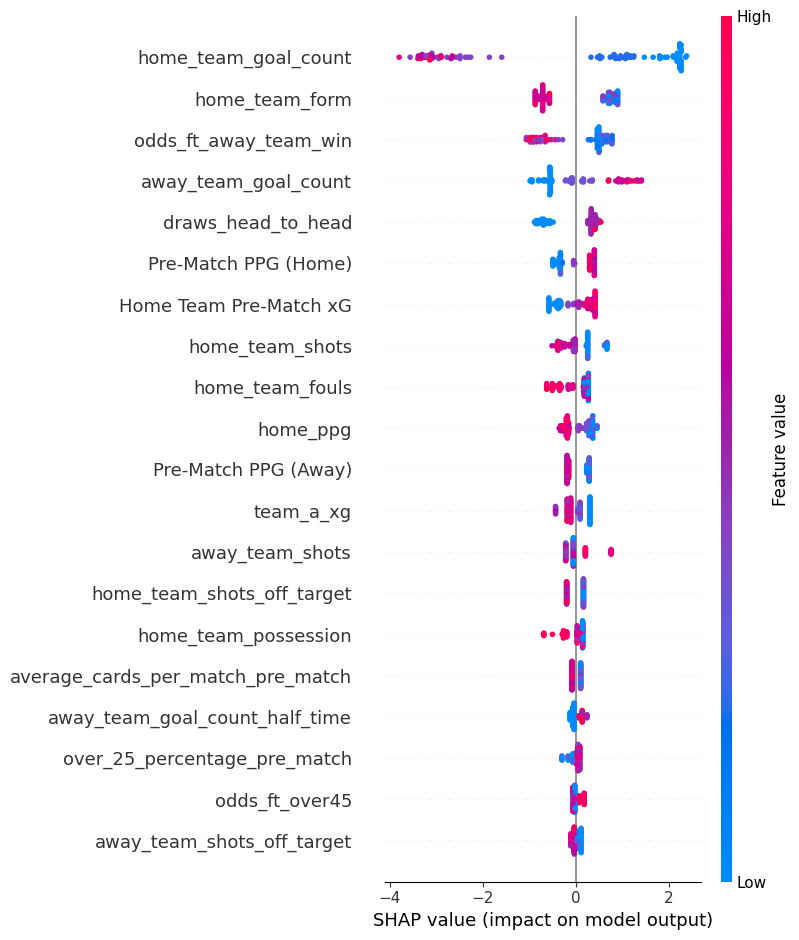

In [ ]:
import shap

# Create a SHAP explainer and calculate SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a set of parameters to test
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    # ... add other parameters here
}

# Initialize the Grid Search
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define a distribution of parameters to test
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    # ... add other parameters here
}

# Initialize the Random Search
random_search = RandomizedSearchCV(XGBClassifier(), param_dist, n_iter=25, cv=3, scoring='accuracy')

# Perform Random Search
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)


Best parameters: {'learning_rate': 0.04343105827061082, 'n_estimators': 201}


In [ ]:
# Assuming 'match_outcome' is your target variable
correlation_matrix = df.corr()
print(correlation_matrix['FTR'].sort_values(ascending=False))


FTR                       1.000000
status_incomplete         0.483909
draws_head_to_head        0.436212
Game Week                 0.369845
timestamp                 0.356006
                            ...   
home_team_goal_count     -0.724397
goal_difference          -0.782962
home_wins_head_to_head   -1.000000
home_team_recent_form          NaN
away_team_recent_form          NaN
Name: FTR, Length: 74, dtype: float64


<ipython-input-162-6b0ed6c10f35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Selecting features and target
features = ['home_team_recent_form', 'away_team_recent_form',
            'average_home_possession', 'average_away_possession',
            # ... include other relevant features
           ]
X = df[features]
y = df['FTR']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.25      0.08      0.12        13
           1       0.45      0.77      0.57        13

    accuracy                           0.42        26
   macro avg       0.35      0.42      0.34        26
weighted avg       0.35      0.42      0.34        26



In [ ]:
df.drop('home_wins_head_to_head', axis=1, inplace=True)


In [ ]:
# Convert the 'favorite_based_on_odds' to a binary outcome similar to 'FTR'
# Assuming 'Home' win is 0 and 'Away' win or 'Draw' is 1
cleaned_matches_data_df['favorite_binary'] = (cleaned_matches_data_df['favorite_based_on_odds'] != 'Home').astype(int)

# Calculate odds accuracy
cleaned_matches_data_df['odds_accuracy'] = (cleaned_matches_data_df['favorite_binary'] == cleaned_matches_data_df['FTR']).astype(int)


In [ ]:
def calculate_recent_form(df, team, num_games=3):
    recent_games = df[((df['home_team_name'] == team) | (df['away_team_name'] == team))].tail(num_games)
    form = 0
    for _, game in recent_games.iterrows():
        if game['home_team_name'] == team:
            if game['FTR'] == 'H':  # Assuming 'H' represents a home win
                form += 1
            elif game['FTR'] == 'A':  # Assuming 'A' represents an away win
                form -= 1
        else:
            if game['FTR'] == 'A':  # Away team wins
                form += 1
            elif game['FTR'] == 'H':  # Home team wins
                form -= 1
    return form

# Applying the function to calculate recent form
df['home_team_recent_form'] = df.apply(lambda row: calculate_recent_form(df, row['home_team_name']), axis=1)
df['away_team_recent_form'] = df.apply(lambda row: calculate_recent_form(df, row['away_team_name']), axis=1)


In [ ]:
# Selecting categorical columns
categorical_cols = ['home_team_name', 'away_team_name', 'referee', 'stadium_name', 'league']

# Applying one-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Aligning columns of train and test set
X_train, X_test = X_train.align(X_test, join='inner', axis=1)  # This ensures both sets have the same dummy columns


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [ ]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to assess model performance
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validated scores:", scores)


ValueError: ignored

In [ ]:
# Selecting categorical columns
categorical_cols = ['home_team_name', 'away_team_name', 'referee', 'stadium_name', 'league']

# Applying one-hot encoding to the entire dataset
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Now perform cross-validation
from sklearn.model_selection import cross_val_score
model = XGBClassifier()
scores = cross_val_score(model, X_encoded, y, cv=5)
print("Cross-validated scores:", scores)


Cross-validated scores: [1. 1. 1. 1. 1.]


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)  # Make sure X_train and y_train are already defined


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Dropping 'goal_difference' if it causes data leakage
df.drop('goal_difference', axis=1, inplace=True)

# Including other features and retraining the model
# (Assuming df is your full dataset, and X, y are your features and target)

X = df.drop('target_column', axis=1)
y = df['target_column']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retraining the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Checking new feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Perform cross-validation to check the model's performance
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)


KeyError: ignored

In [ ]:
import pandas as pd

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the feature importances
print(feature_importances)


                                     importance
goal_difference                             1.0
timestamp                                   0.0
away_team_name_Olympique Marseille          0.0
home_team_name_Union Saint-Gilloise         0.0
home_team_name_Villarreal                   0.0
...                                         ...
over_25_percentage_pre_match                0.0
over_15_percentage_pre_match                0.0
btts_percentage_pre_match                   0.0
average_goals_per_match_pre_match           0.0
league_UEFA Europa League                   0.0

[136 rows x 1 columns]


In [ ]:
# Assuming 'favorite_based_on_odds' is the column that shows the expected winner based on odds
cleaned_matches_data_df['odds_accuracy'] = (cleaned_matches_data_df['favorite_based_on_odds'] == cleaned_matches_data_df['FTR']).astype(int)


In [ ]:
incorrect_odds_df = cleaned_matches_data_df[cleaned_matches_data_df['odds_accuracy'] == 0]
# Perform analysis on 'incorrect_odds_df' to find patterns


# Example: Adding a new feature and retraining the model
# cleaned_matches_data_df['new_feature'] = some_transformation_of_existing_data
# Repeat the model training and evaluation process
